In [1]:
include("MC.jl");

In [130]:
include("viz.jl");

In [1]:
ENV["COLUMNS"] = 200
const N = 30;

### city option

In [2]:
city = "Berlin"

fn_city = "irradiation_Berlin.nc"
fn_city_w  = "irradiation_Berlin_W.nc";
fn_2020 = "irradiation2020_Berlin.nc"
fn_2020_w  = "irradiation2020_Berlin_W.nc";

In [117]:
city = "(a) Athens"

fn_city = "irradiation_Athens.nc"
fn_city_w  = "irradiation_Athens_W.nc"
fn_2020 = "irradiation2020_Athens.nc"
fn_2020_w  = "irradiation2020_Athens_W.nc";

In [125]:
city = "(b) Bucharest"

fn_city = "irradiation_Bucharest.nc"
fn_city_w  = "irradiation_Bucharest_W.nc"
fn_2020 = "irradiation2020_Bucharest.nc"
fn_2020_w  = "irradiation2020_Bucharest_W.nc";

In [132]:
city = "(c) Helsinki"
city1 = "(d) Helsinki"

fn_city = "irradiation_Helsinki.nc"
fn_city_w  = "irradiation_Helsinki_W.nc"
fn_2020 = "irradiation2020_Helsinki.nc"
fn_2020_w  = "irradiation2020_Helsinki_W.nc";

In [60]:
tit = city*" 2020";

In [133]:
test = getCMF0(fn_city; raw=1)[2]
test_neib_w = getCMF0(fn_city_w; raw=1)[2]

test2020 = getCMF1(fn_2020)
test2020_neib_w = getCMF1(fn_2020_w);

df01 = getDFtm(fn_city)
df02 = getDFtm(fn_2020);

df1_train = df01[1:523007, :]
df1_test = df01[523008:end, :]
df2_train = calCMF(df1_train)
data_train = df2_train.real

data_train_cls, binStarts, binMean = getBins(data_train, N);

In [112]:
ticks = rd.(binMean, 2);

In [105]:
xti = (binMean[[1:2:24; 30]], ticks[[1:2:24; 30]]); # Berlin or Bucharest

In [63]:
xti = (binMean[[1:2:15; 25; 30]], ticks[[1:2:15; 25; 30]]); # Athens

In [87]:
xti = (binMean[[2:2:28; 30]], ticks[[2:2:28; 30]]); # Helsinki

### compute DFs

In [134]:
df21 = getDF(2, 1)

df22 = getDF(2, 2)
df23 = getDF(2, 3)
df24 = getDF(2, 4);

df21_2020 = getDF(2, 1; df_test=df02, d_test=test2020, d_neib=test2020_neib_w)

df22_2020 = getDF(2, 2; df_test=df02, d_test=test2020, d_neib=test2020_neib_w)
df23_2020 = getDF(2, 3; df_test=df02, d_test=test2020, d_neib=test2020_neib_w)
df24_2020 = getDF(2, 4; df_test=df02, d_test=test2020, d_neib=test2020_neib_w);

df1t = hybrid(df21, df21_2020, 1) # df test 2020 include all difs

df2t = hybrid(df22, df22_2020, 2)
df3t = hybrid(df23, df23_2020, 3)
df4t = hybrid(df24, df24_2020, 4);

### Monthly avg

In [114]:
gbb = groupby(df1t, :month)
ghi_mo = [mean(g.ghi) for g in gbb]
cmf_mo = [mean(g.real) for g in gbb];

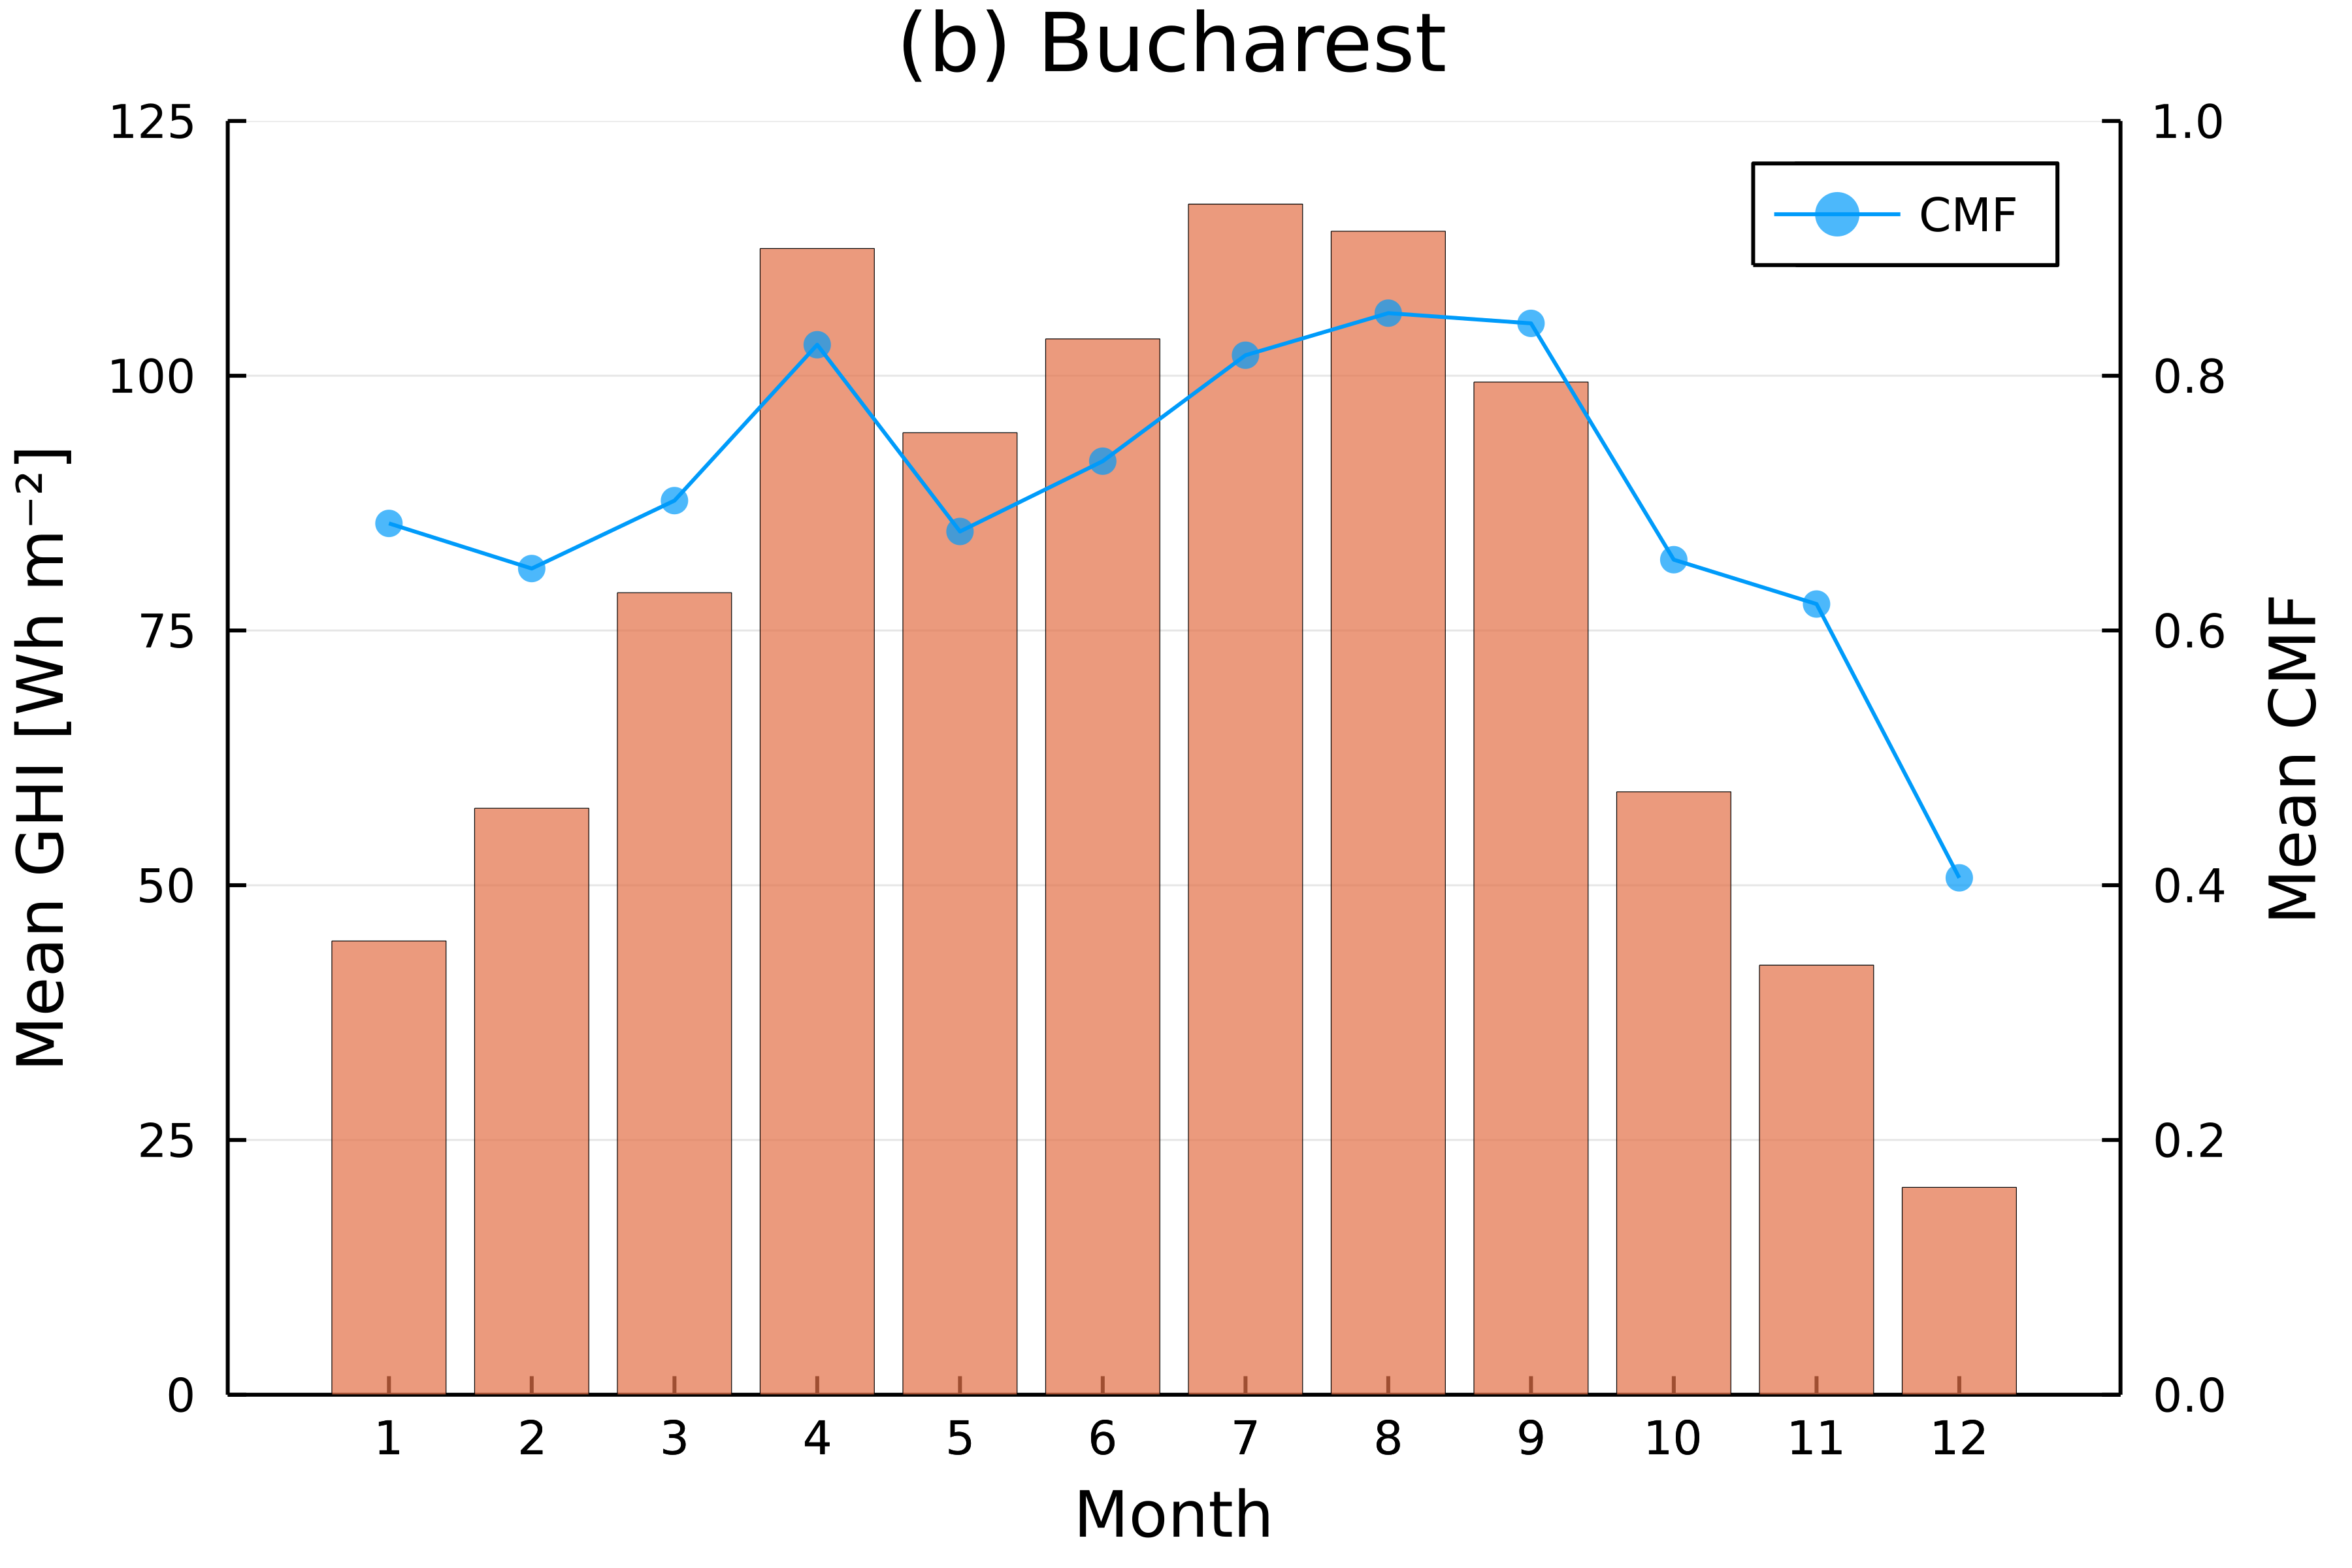

In [115]:
avg_be = bar(ghi_mo, c=2, lw=0.2, fillalpha=0.7, grid=:y, right_margin=1.3cm,
    xtick=1:12, 
#     ytick=0:20:100, ylim=(0,100), # be or he
#     ytick=0:25:150, ylim=(0,150), # at
    ytick=0:25:125, ylim=(0,125), # bu
    xlabel="Month", ylabel="Mean GHI [Wh m⁻²]", title=city)
plot!(twinx(), cmf_mo, marker=(0.7, stroke(0)), 
    xtick=1:12, ylim=(0,1), label="CMF", ylabel="Mean CMF") 

### std 
#### by num of class

In [10]:
function std_nc(nc, steps)
    data_train_cls, binStarts, binMean = getBins(data_train, nc) 
    println(length(binStarts))
    df = getDF(2, steps; n=nc, data_train_cls=data_train_cls, binStarts=binStarts, binMean=binMean)
    df_2020 = getDF(2, steps; n=nc, data_train_cls=data_train_cls, binStarts=binStarts, binMean=binMean,
        df_test=df02, d_test=test2020, d_neib=test2020_neib_w) 
    return std(df_2020.dif_pred)
end

std_nc (generic function with 1 method)

In [11]:
stds1 = []
stds2 = []
stds3 = []
stds4 = []
for n in 5:5:40
    st1 = std_nc(n, 1)
    st2 = std_nc(n, 2)
    st3 = std_nc(n, 3)
    st4 = std_nc(n, 4)
    push!(stds1, st1)
    push!(stds2, st2)
    push!(stds3, st3)
    push!(stds4, st4)
end

5
5
5
5
10
10
10
10
15
15
15
15
20
20
20
20
25
25
25
25
30
30
30
30


LoadError: BoundsError: attempt to access 34-element Vector{Int64} at index [35]

In [ ]:
plot(5:5:40, [stds4 stds3 stds2 stds1], marker=(0.7, stroke(0)), ylim=(0,0.18), grid=:y,
    lab=["+60 min" "+45 min" "+30 min" "+15 min"], leg=:bottomright, 
    xticks=5:5:40, xlabel="Number of CMF class", ylabel="Bias standard deviation", title=city*" validation")

#### by order

In [13]:
std1od = []
std2od = []
std3od = []
for st in 1:4
    df1 = getDF(1, st)
    df2 = getDF(2, st)
    df3 = getDF(3, st)
    push!(std1od, std(df1.dif_pred))
    push!(std2od, std(df2.dif_pred))
    push!(std3od, std(df3.dif_pred))
end

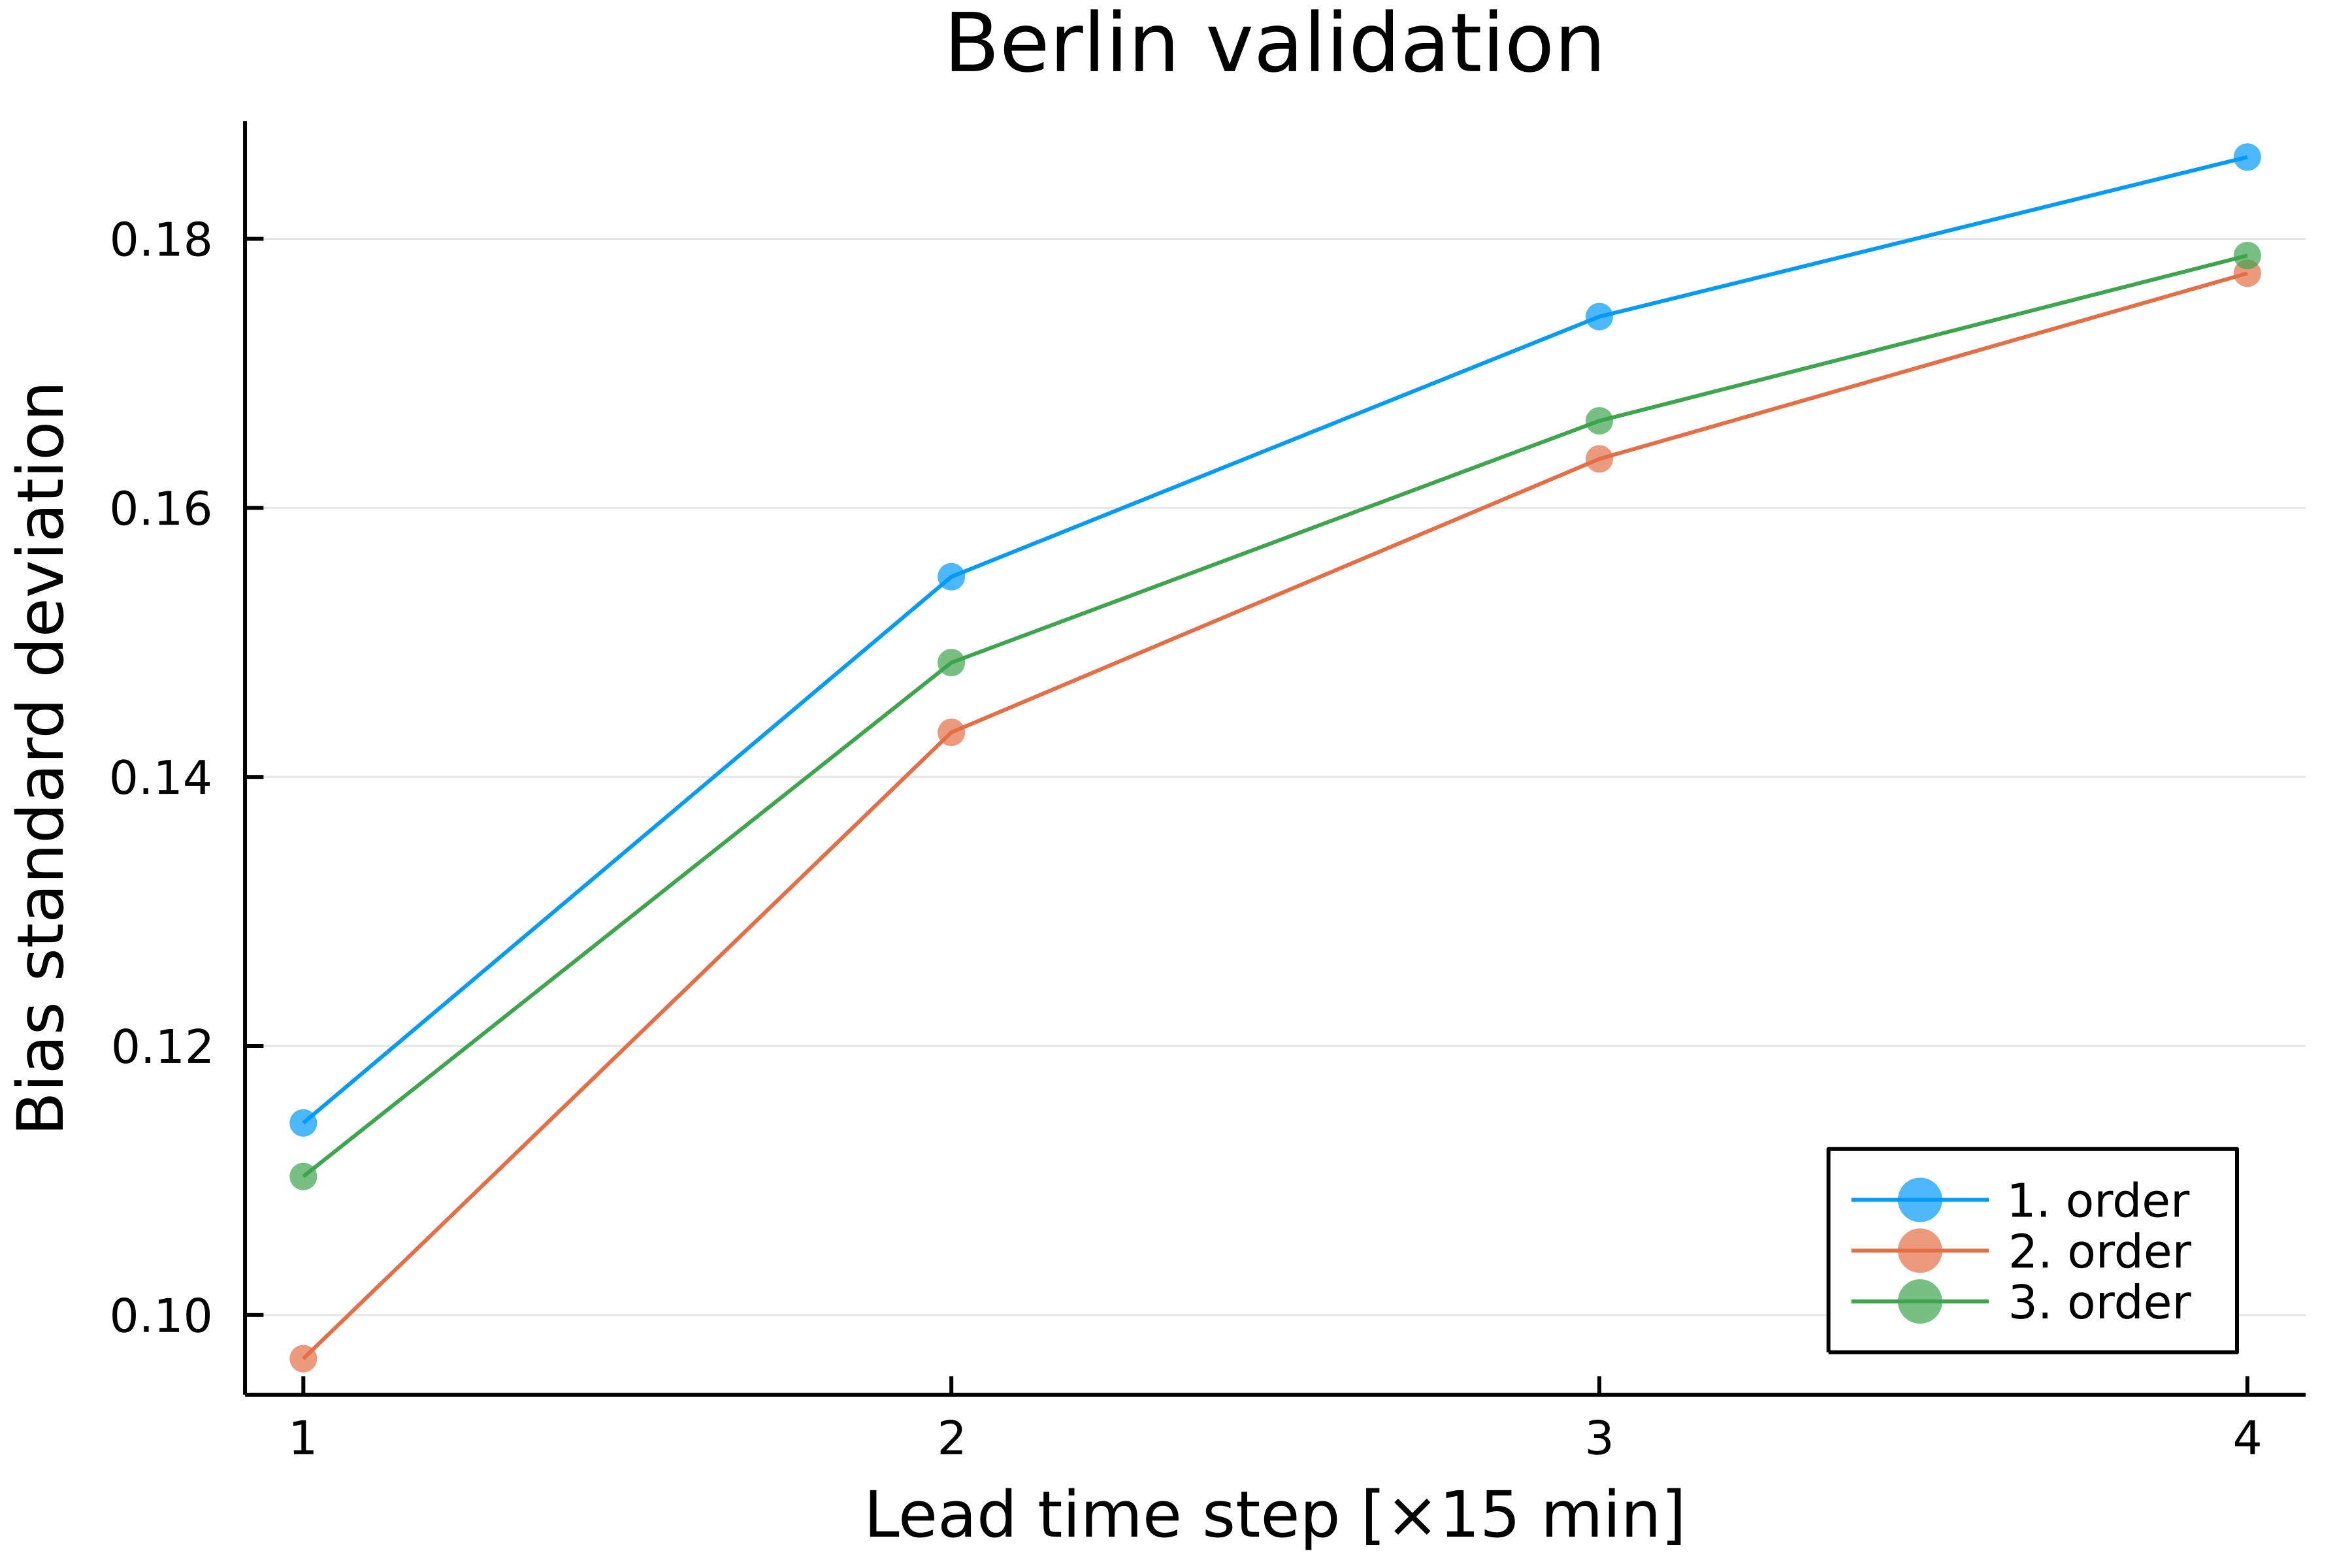

In [14]:
plot(1:4, [std1od std2od std3od], marker=(0.7, stroke(0)), grid=:y,
    lab=["1. order" "2. order" "3. order"], leg=:bottomright, 
    xlabel="Lead time step [×15 min]", ylabel="Bias standard deviation", title=city*" validation")

### distri

In [15]:
h_train = histogram(data_train, bins=binStarts, xticks=xti, ylabel="Counts",
    title="(a) training")

h_vali = histogram(df21.real, bins=binStarts, xticks=xti, 
    title="(b) validation")

h_test = histogram(df21_2020.real, bins=binStarts, xticks=xti, 
    title="(c) test");

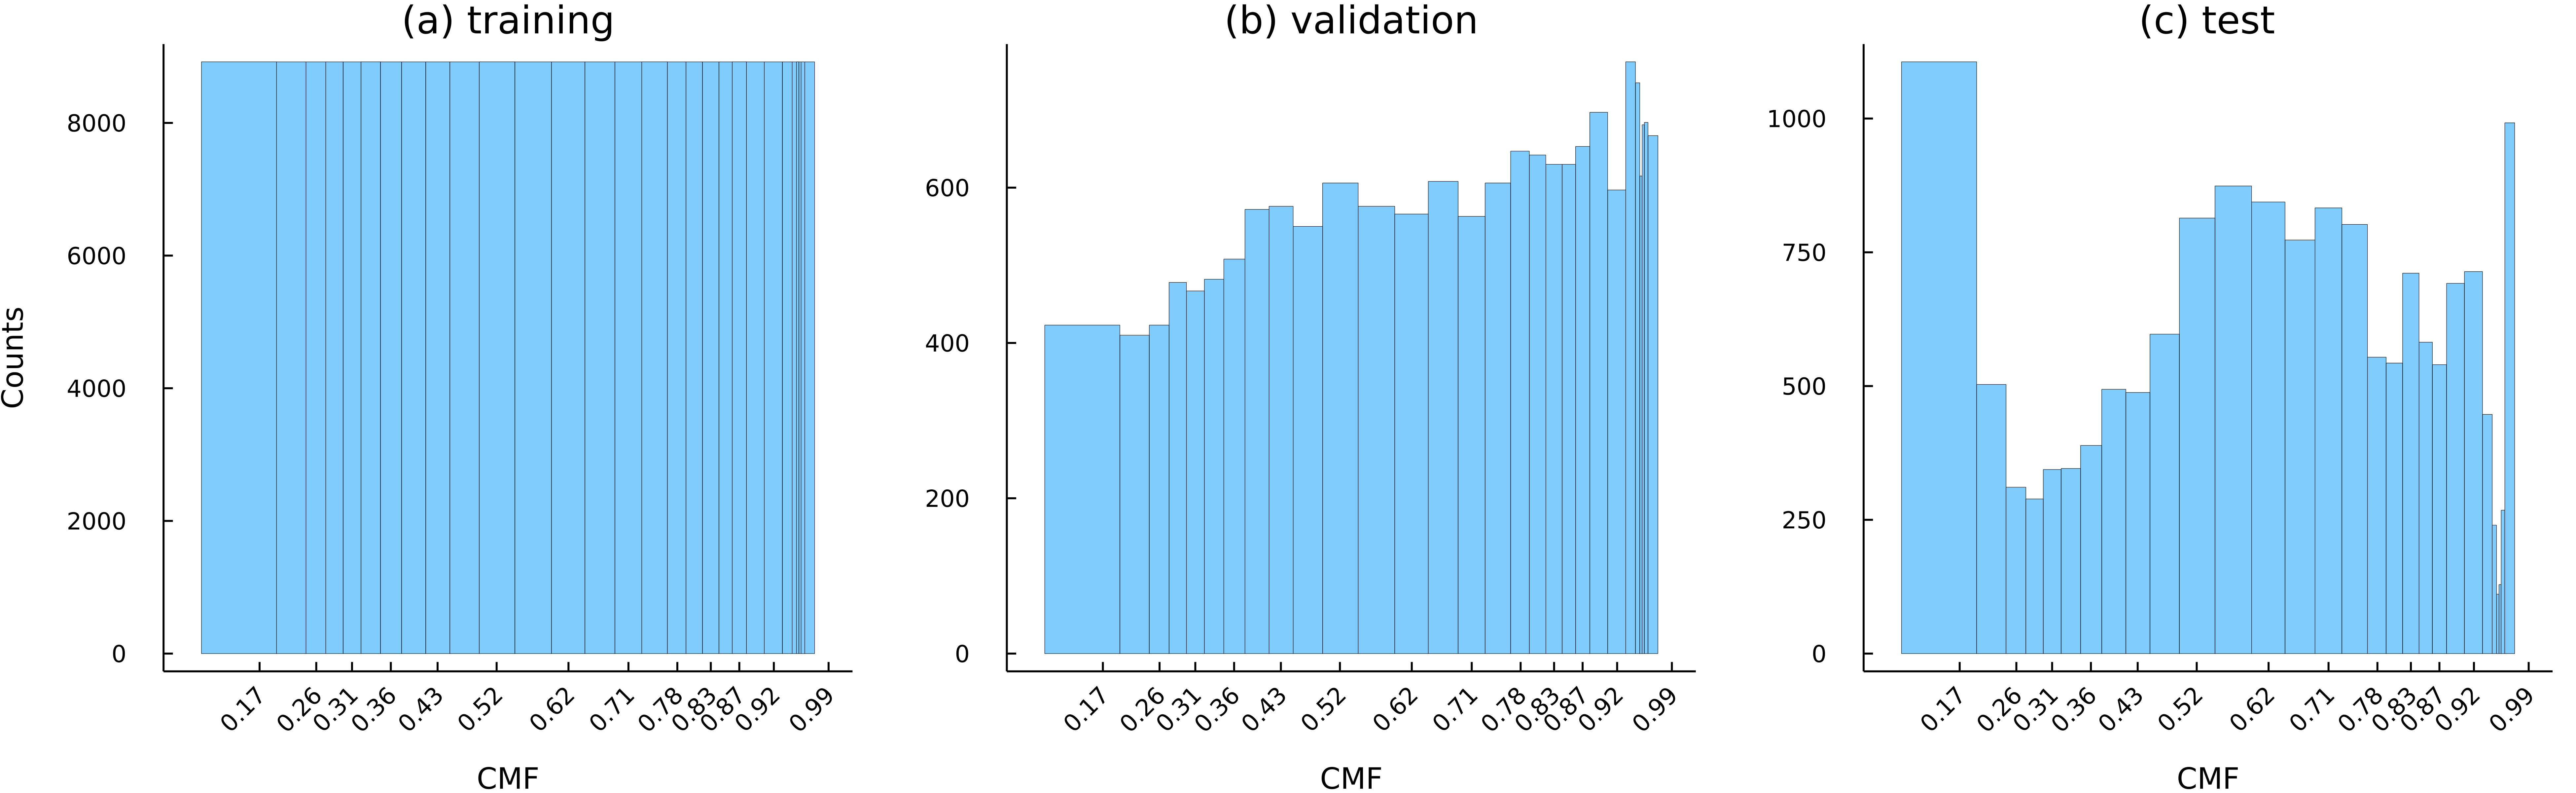

In [16]:
hists = plot(h_train, h_vali, h_test, layout=@layout([a b c]), leg=false, grid=false, xlabel="CMF", xrotation=45, 
    lw=0.2, fillalpha=0.5, labelfontsize=10, titlefontsize=13, tickfontsize=8, ylim=(0, ),
    leftmargin=20px, bottommargin=25px, size=(1300,400))

### test prediction

In [ ]:
s_t_2 = df21.pers_cls
s_t_1 = df21.real_cls
pred = df21.pred;

T, T_ct = zeros(N, N), zeros(N, N)
len = length(pred)
for i in 1:len-1
    T[s_t_2[i], s_t_1[i]] += pred[i+1]
    T_ct[s_t_2[i], s_t_1[i]] += 1
end

T_test = T ./ T_ct;

In [ ]:
hm_test = heatmap(binMean, binMean, T_test, c=cgrad(:Spectral_10, rev=true), clim=(0,1), grid=false, 
    title="CMFₜ (pred)", size=(500,500), tickfontsize=7,
    xticks=xti, yticks=xti, xrotation=45, 
    xlabel="CMFₜ₋₂", ylabel="CMFₜ₋₁")

### std dev

In [91]:
sds = aplTs(df1t, std)
append!(sds, aplTs(df2t, std))
append!(sds, aplTs(df3t, std))
append!(sds, aplTs(df4t, std));

col3 = combine(df2t, :dif_pred_n => std => :mc_b)
append!(col3, combine(df3t, :dif_pred_n => std => :mc_b))
append!(col3, combine(df4t, :dif_pred_n => std => :mc_b))

col4 = reshape([NaN; Array(col3)], 4);

insertcols!(sds, 4, :mc_b => col4)

4×6 DataFrame
 Row │ pers      neib      pred       mc_b        hyb_m      hyb_r     
     │ Float64   Float64   Float64    Float64     Float64    Float64   
─────┼─────────────────────────────────────────────────────────────────
   1 │ 0.120909  0.126974  0.0896821  NaN         0.0908869  0.0901053
   2 │ 0.1759    0.177822  0.148338     0.146739  0.141049   0.141473
   3 │ 0.198313  0.198384  0.178743     0.183517  0.161754   0.160866
   4 │ 0.213305  0.212923  0.199576     0.212326  0.177148   0.176756

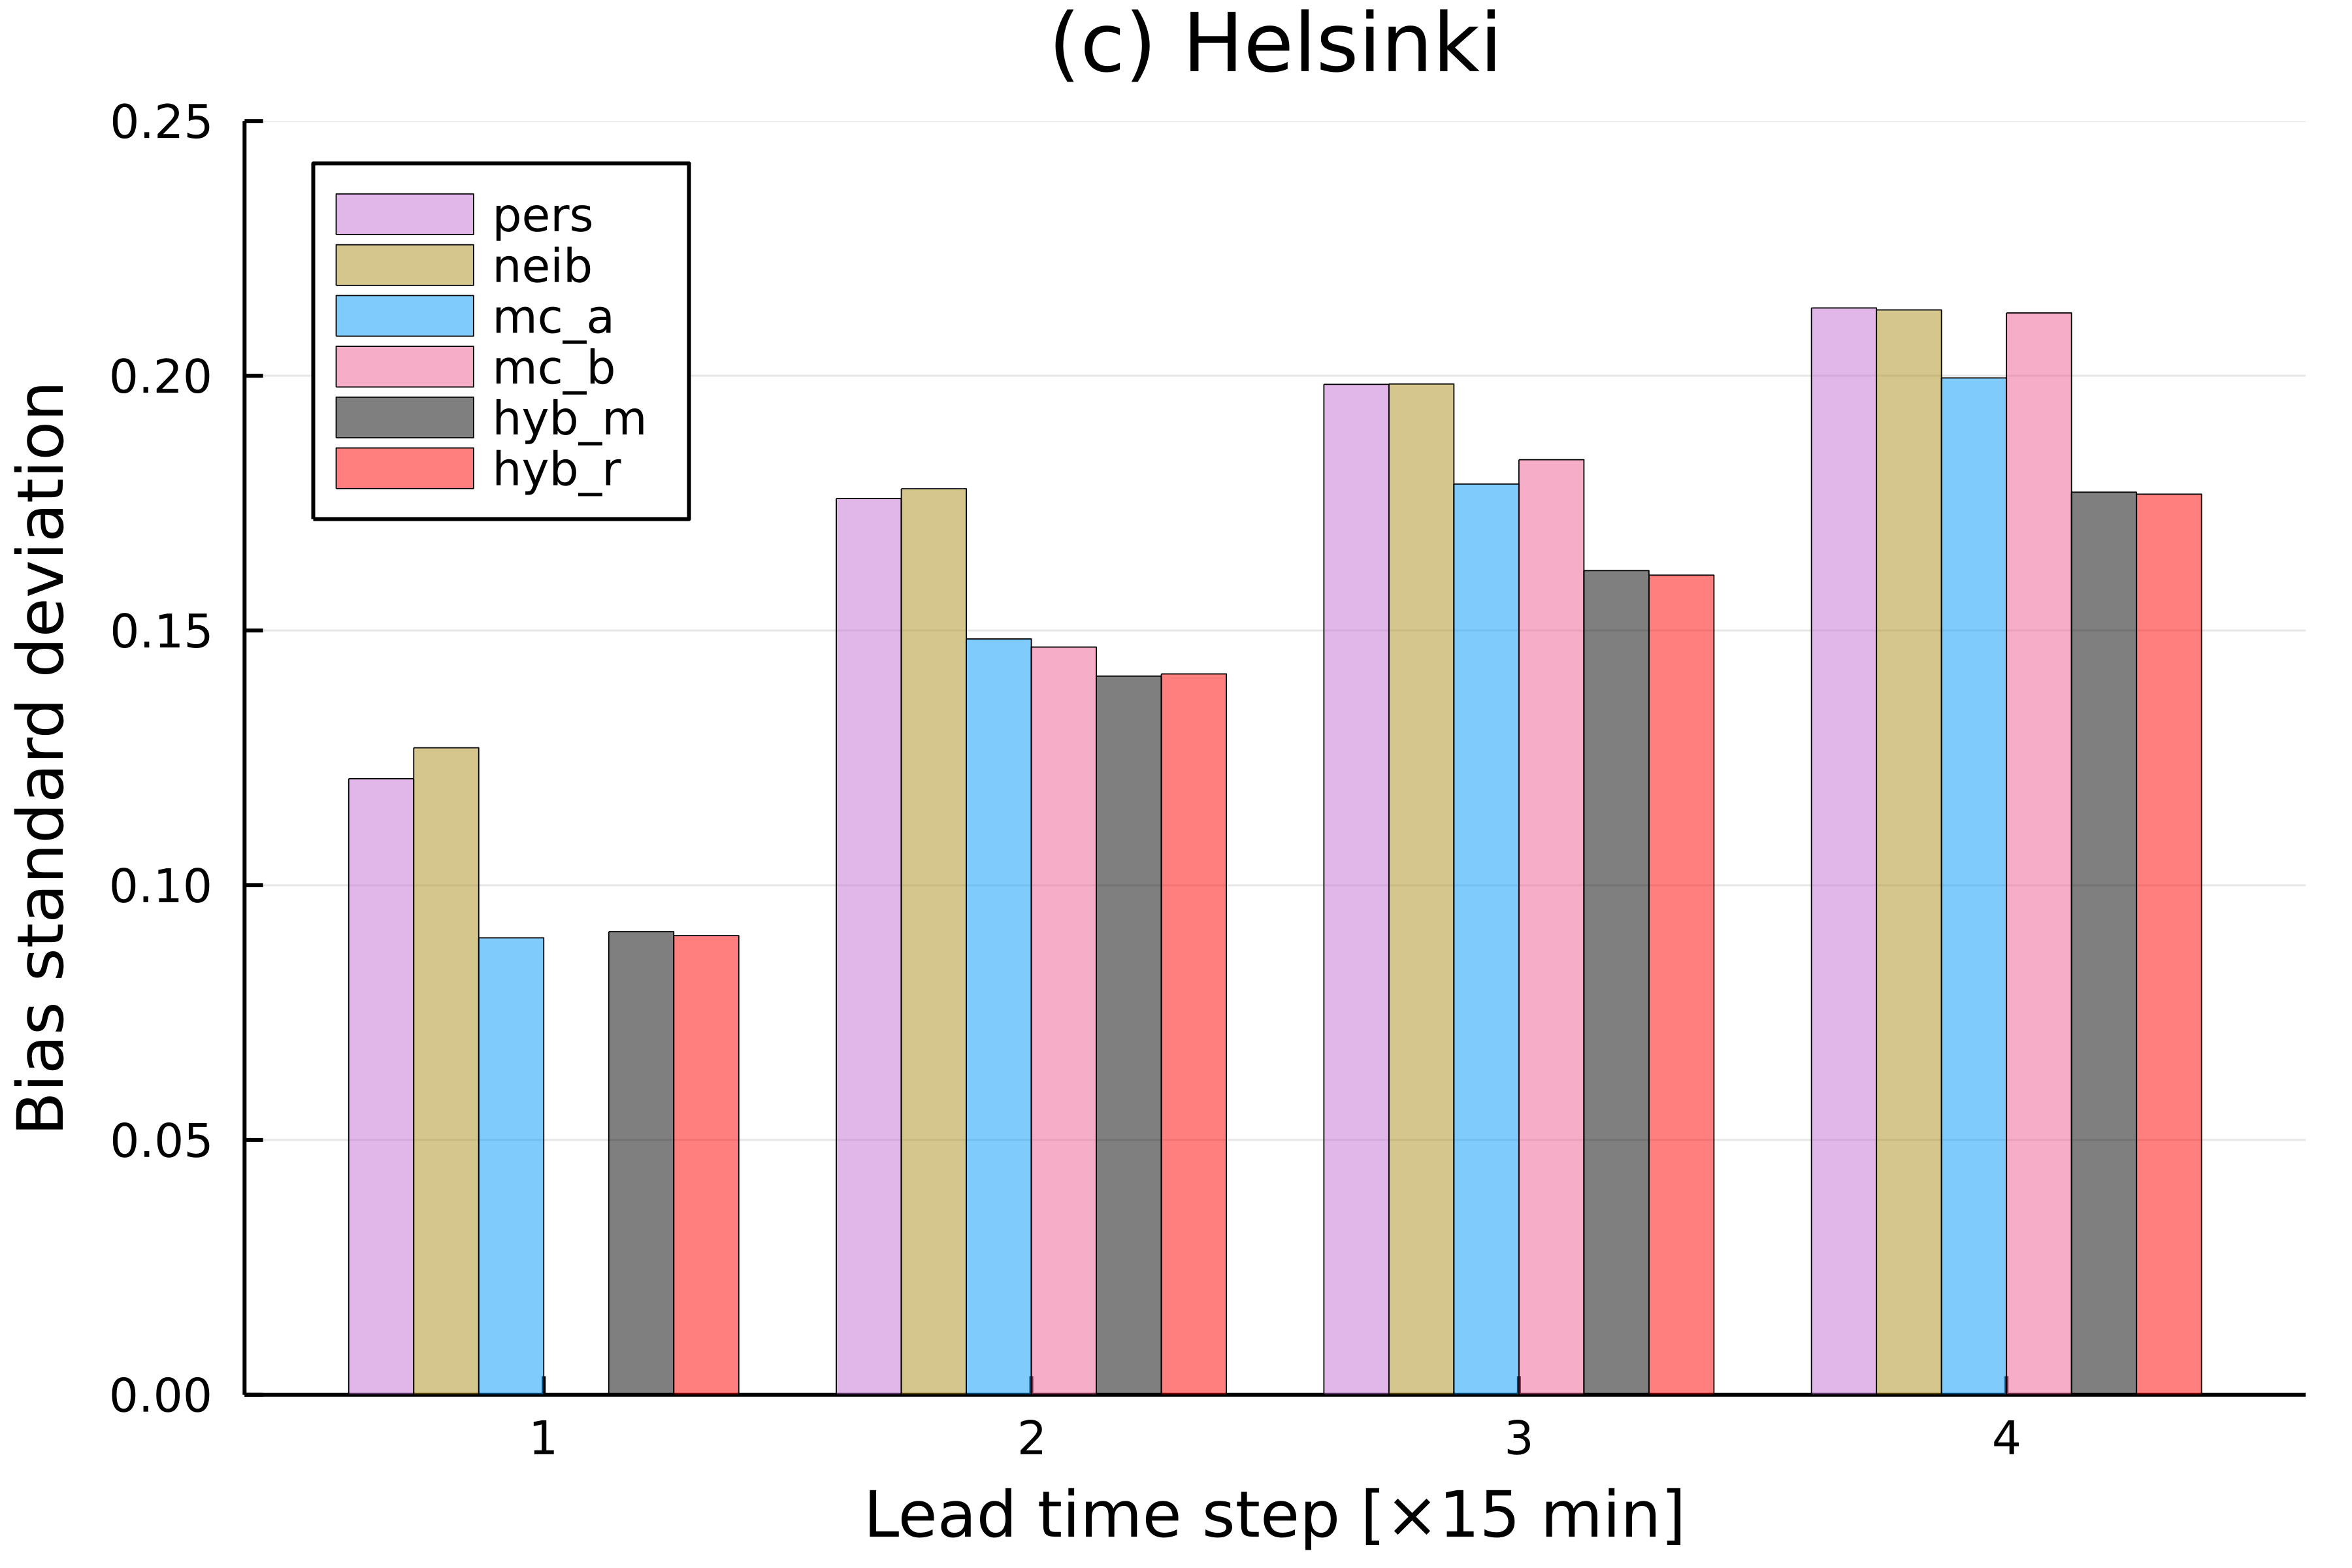

In [92]:
gb_be = groupedbar(Matrix(sds), leg=:topleft, label=["pers" "neib" "mc_a" "mc_b" "hyb_m" "hyb_r"],
    c=[4 5 1 7 "black" "red"], lw=0.3, fillalpha=0.5, grid=:y, 
#     ylim=(0, 0.205), 
    ylim=(0, 0.25), # he
    xlabel="Lead time step [×15 min]", ylabel="Bias standard deviation", title=tit)

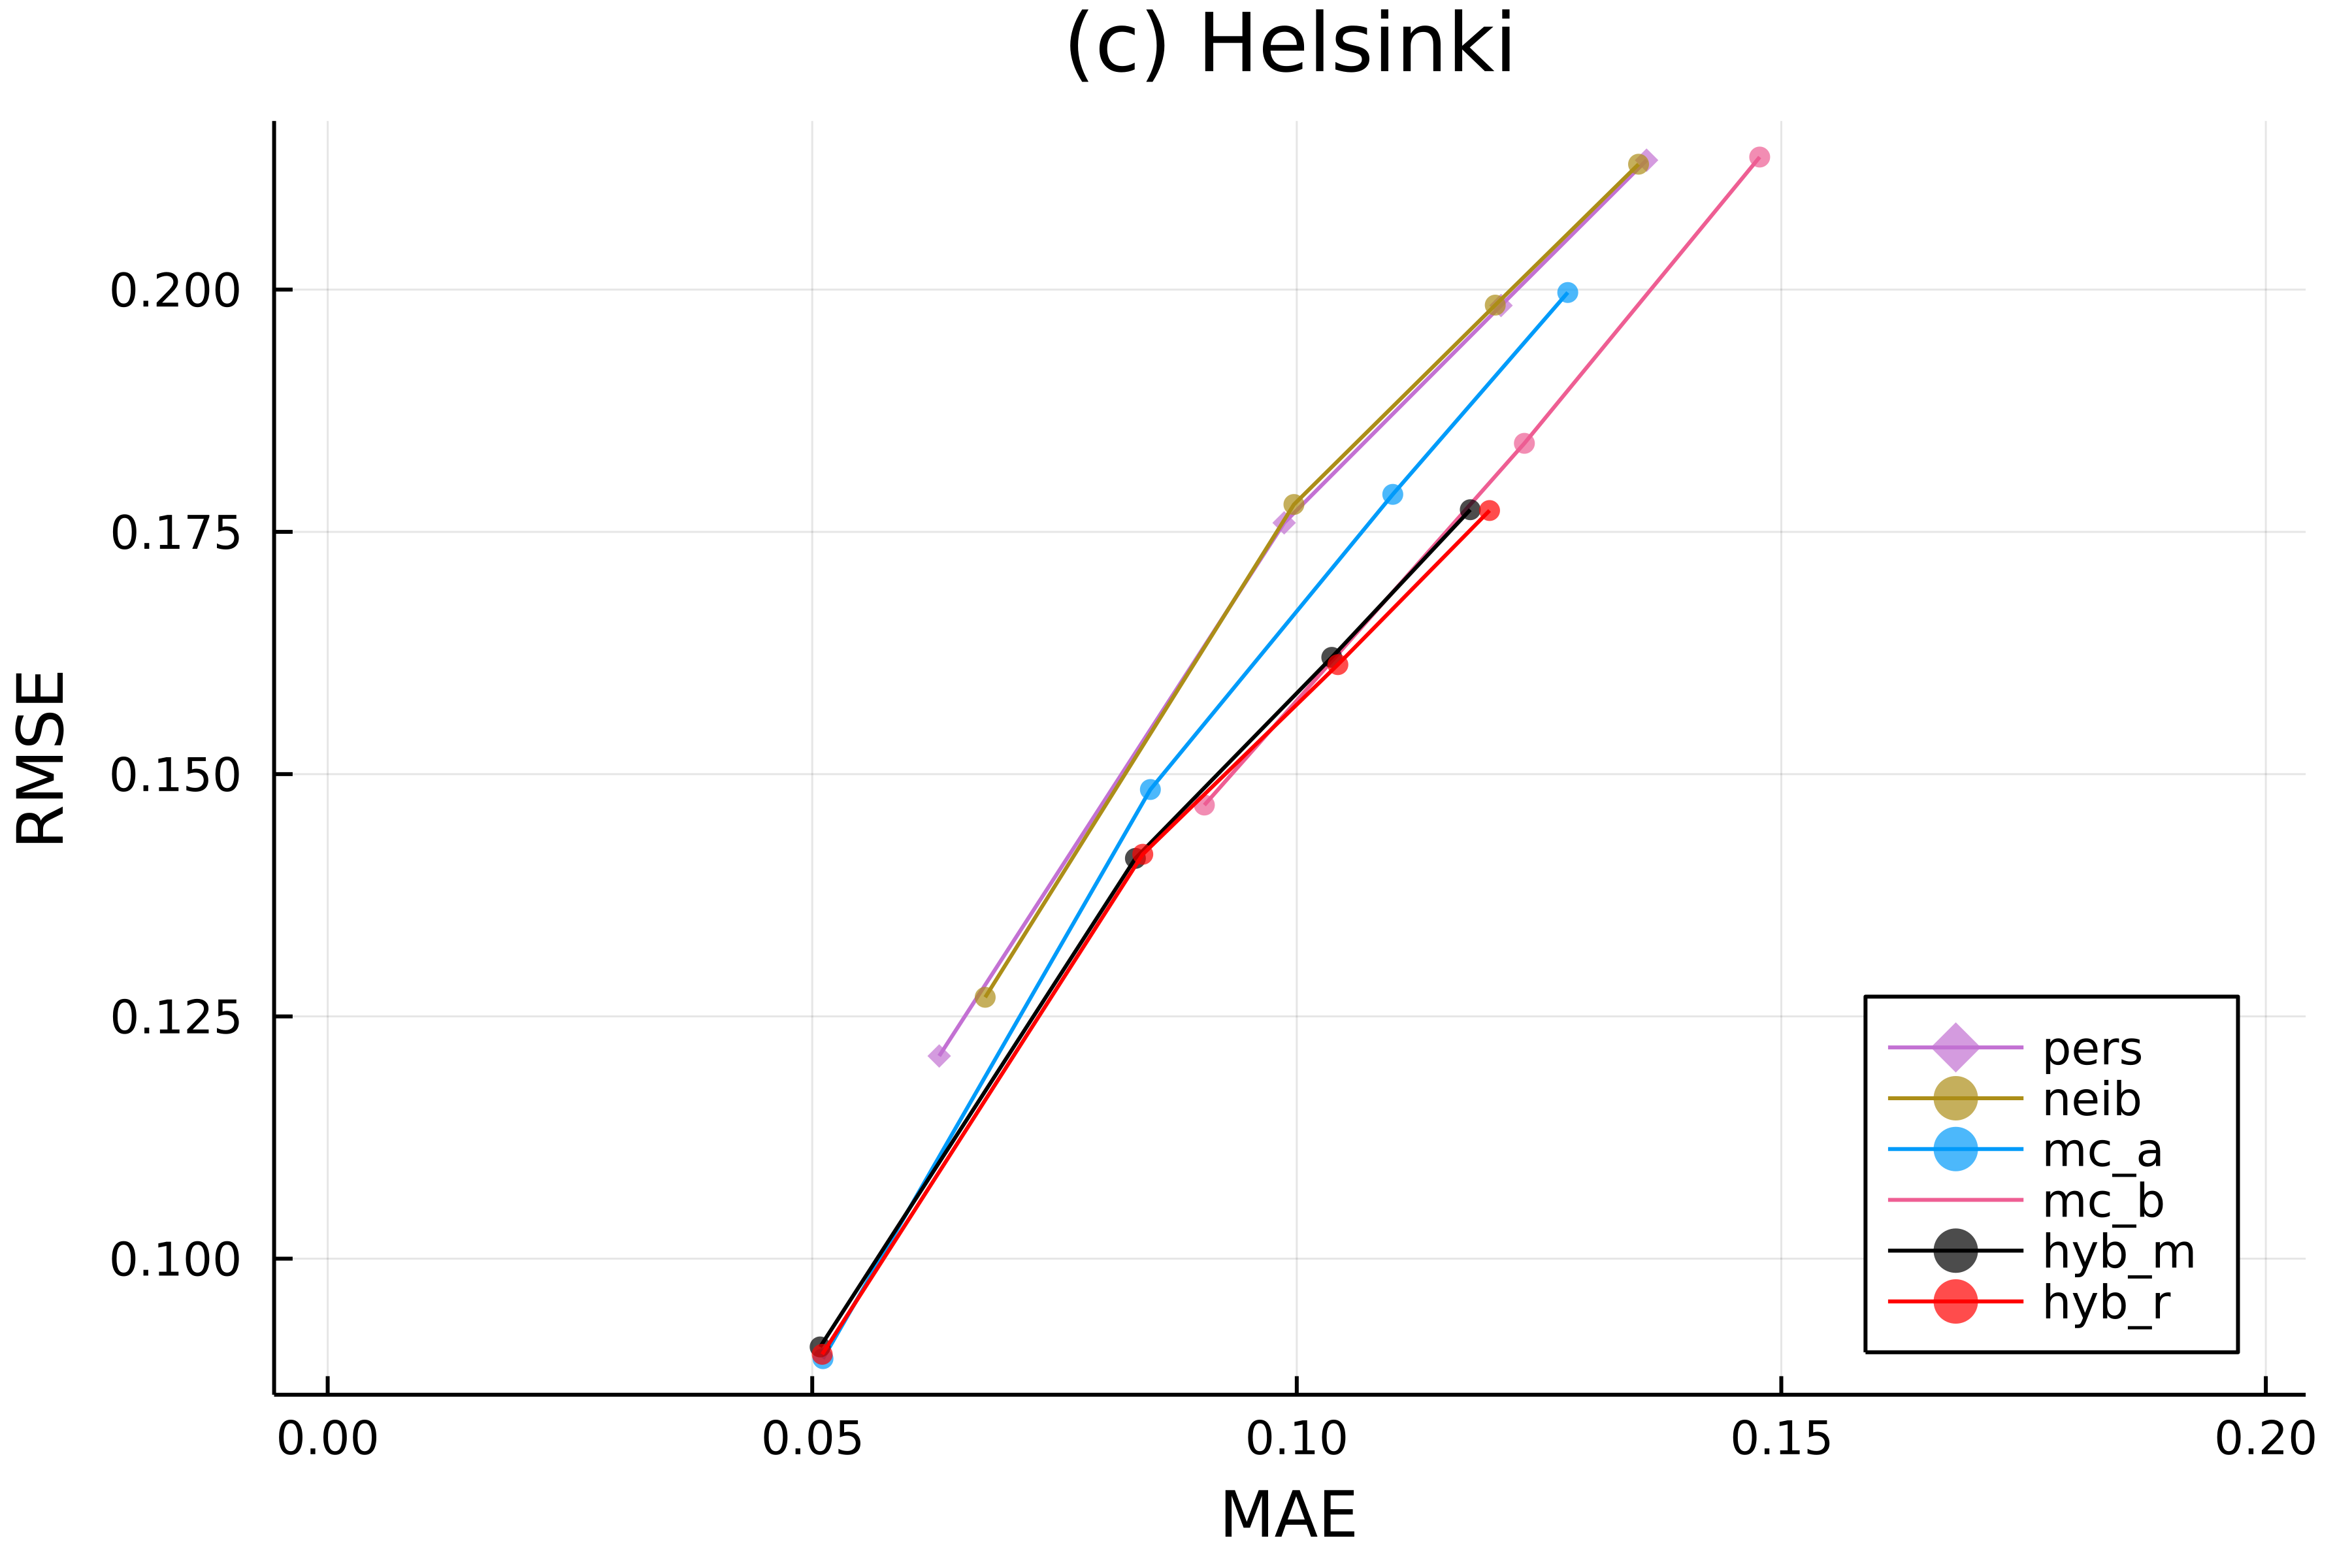

In [93]:
errs = mae_vs_rmse(df1t, df2t, df3t, df4t; tit=tit)

In [95]:
mae1 = viz_err1(df1t, binMean, xti; tit="(a) +$(15*1) min")
mae2 = viz_err1(df2t, binMean, xti; tit="(b) +$(15*2) min")
mae3 = viz_err1(df3t, binMean, xti; tit="(c) +$(15*3) min")
mae4 = viz_err1(df4t, binMean, xti; tit="(d) +$(15*4) min");

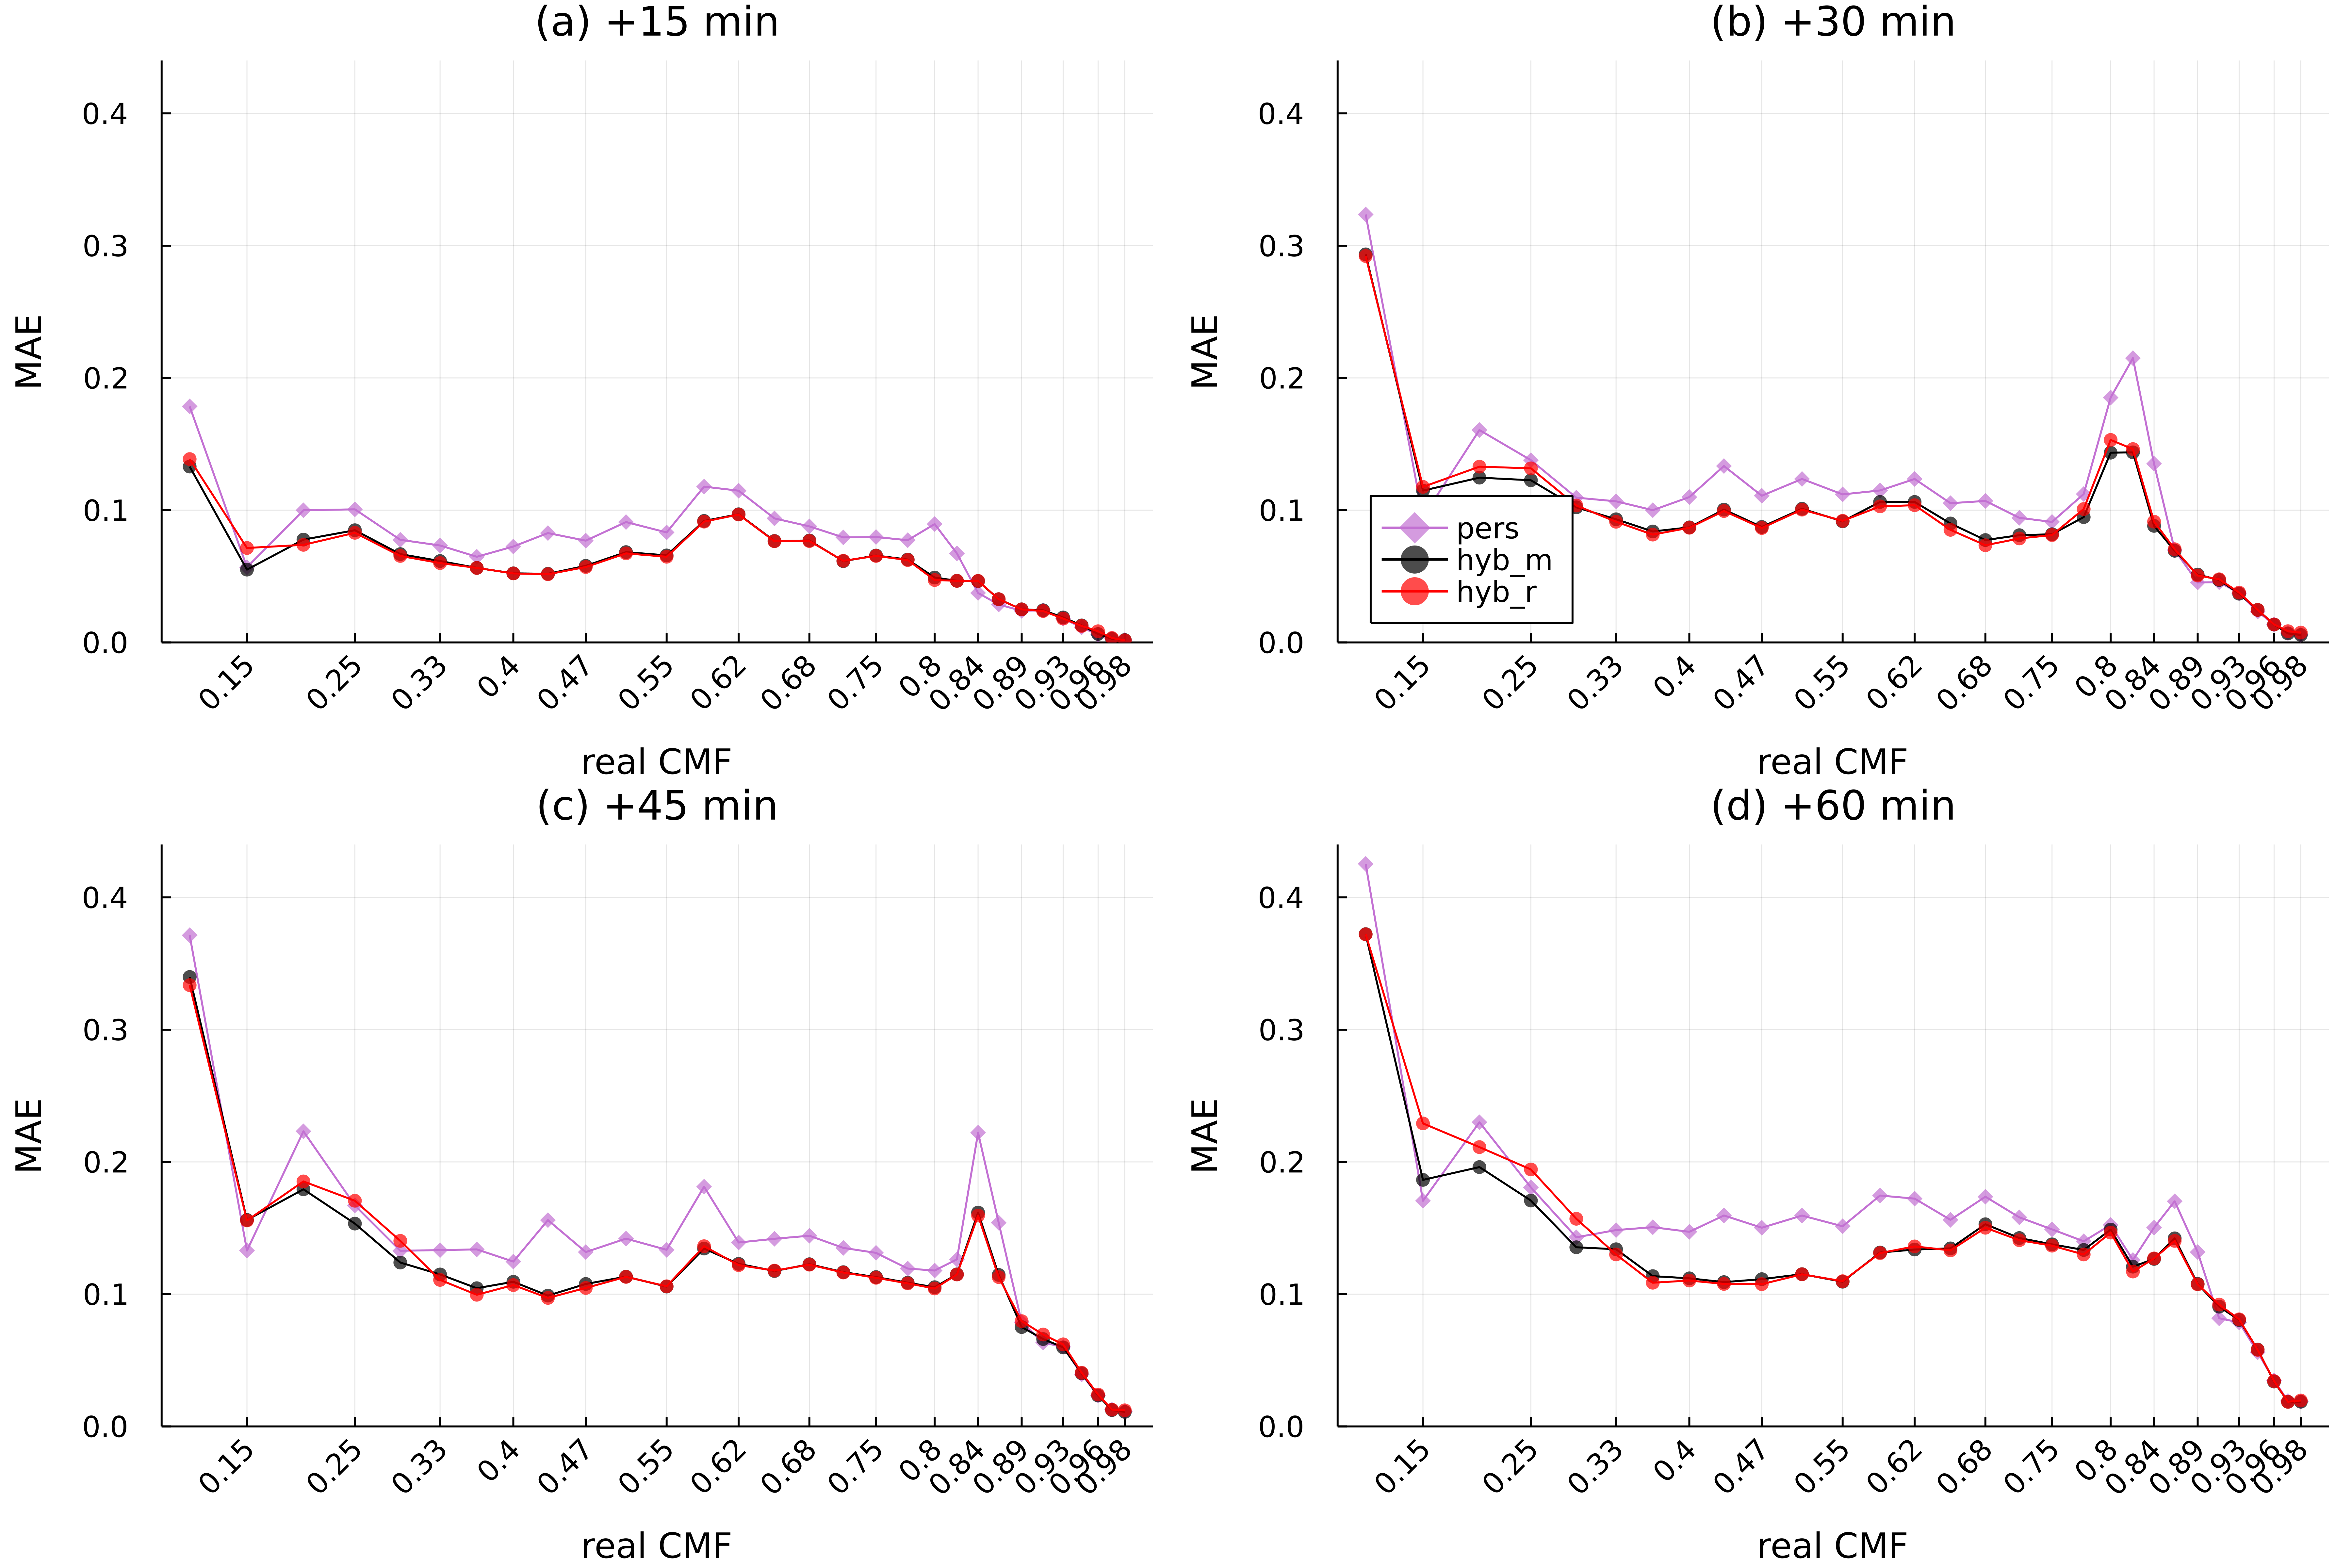

In [96]:
maes = plot(mae1, mae2, mae3, mae4, layout=@layout([a b; c d]), size=(1200, 800), 
    labelfontsize=12, tickfontsize=10, legendfontsize=10, 
#     ylim=(0, 0.34), # bu
#     ylim=(0, 0.31), # at
    ylim=(0, 0.44), # he
    leftmargin=20px)

### dif CMF vs Err

In [97]:
dif1 = viz_dif(df1t, 1, tit=tit_steps[1])

dif2 = viz_dif(df2t, 2, tit=tit_steps[2])
dif3 = viz_dif(df3t, 3, tit=tit_steps[3])
dif4 = viz_dif(df4t, 4, tit=tit_steps[4]);

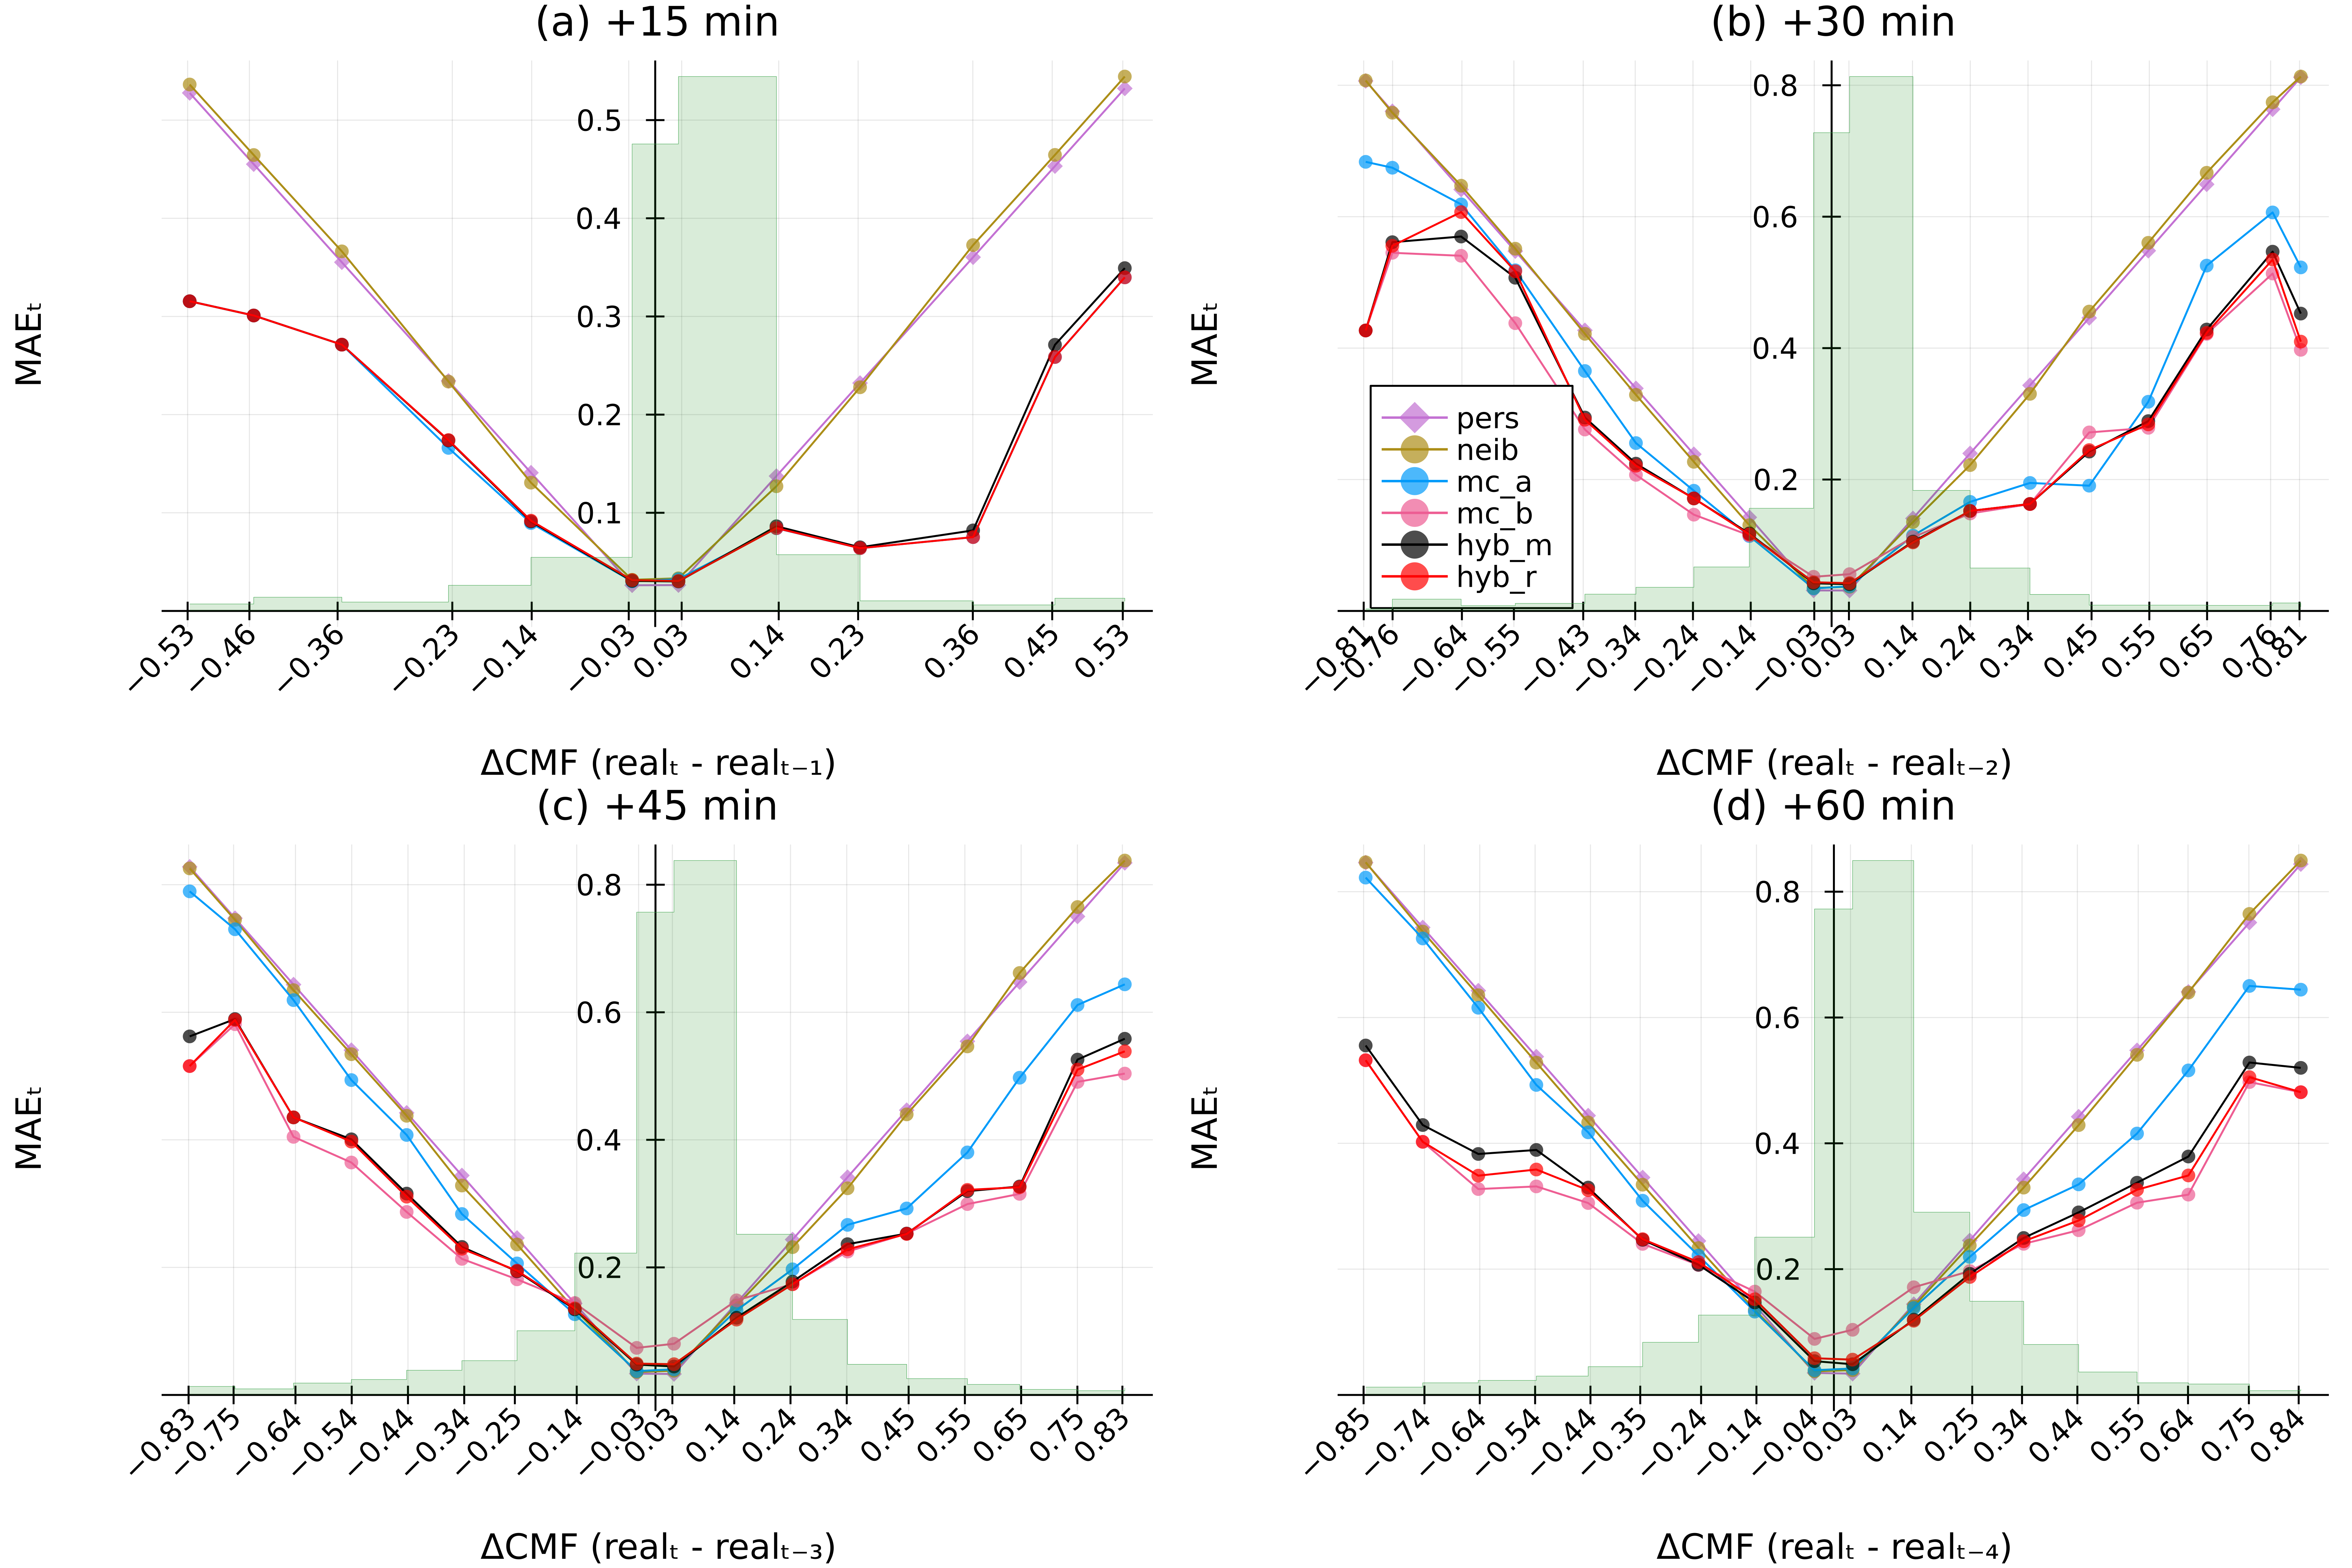

In [98]:
difs = plot(dif1, dif2, dif3, dif4, layout=@layout([a b; c d]), size=(1200, 800), #ylim=(0, 1.01), 
    labelfontsize=12, tickfontsize=10, legendfontsize=10, 
    leftmargin=20px, ylabel="MAEₜ")

### CMF -> GHI

In [54]:
df1g = getGHI(df1t, 1)
df2g = getGHI(df2t, 2)

df3g = getGHI(df3t, 3)
df4g = getGHI(df4t, 4);

In [27]:
dfg = df2g[1:300, :]

ghi = dfg.ghi
ghi_hyb_m = dfg.ghi_hyb_m
ghi_hyb_r = dfg.ghi_hyb_r;

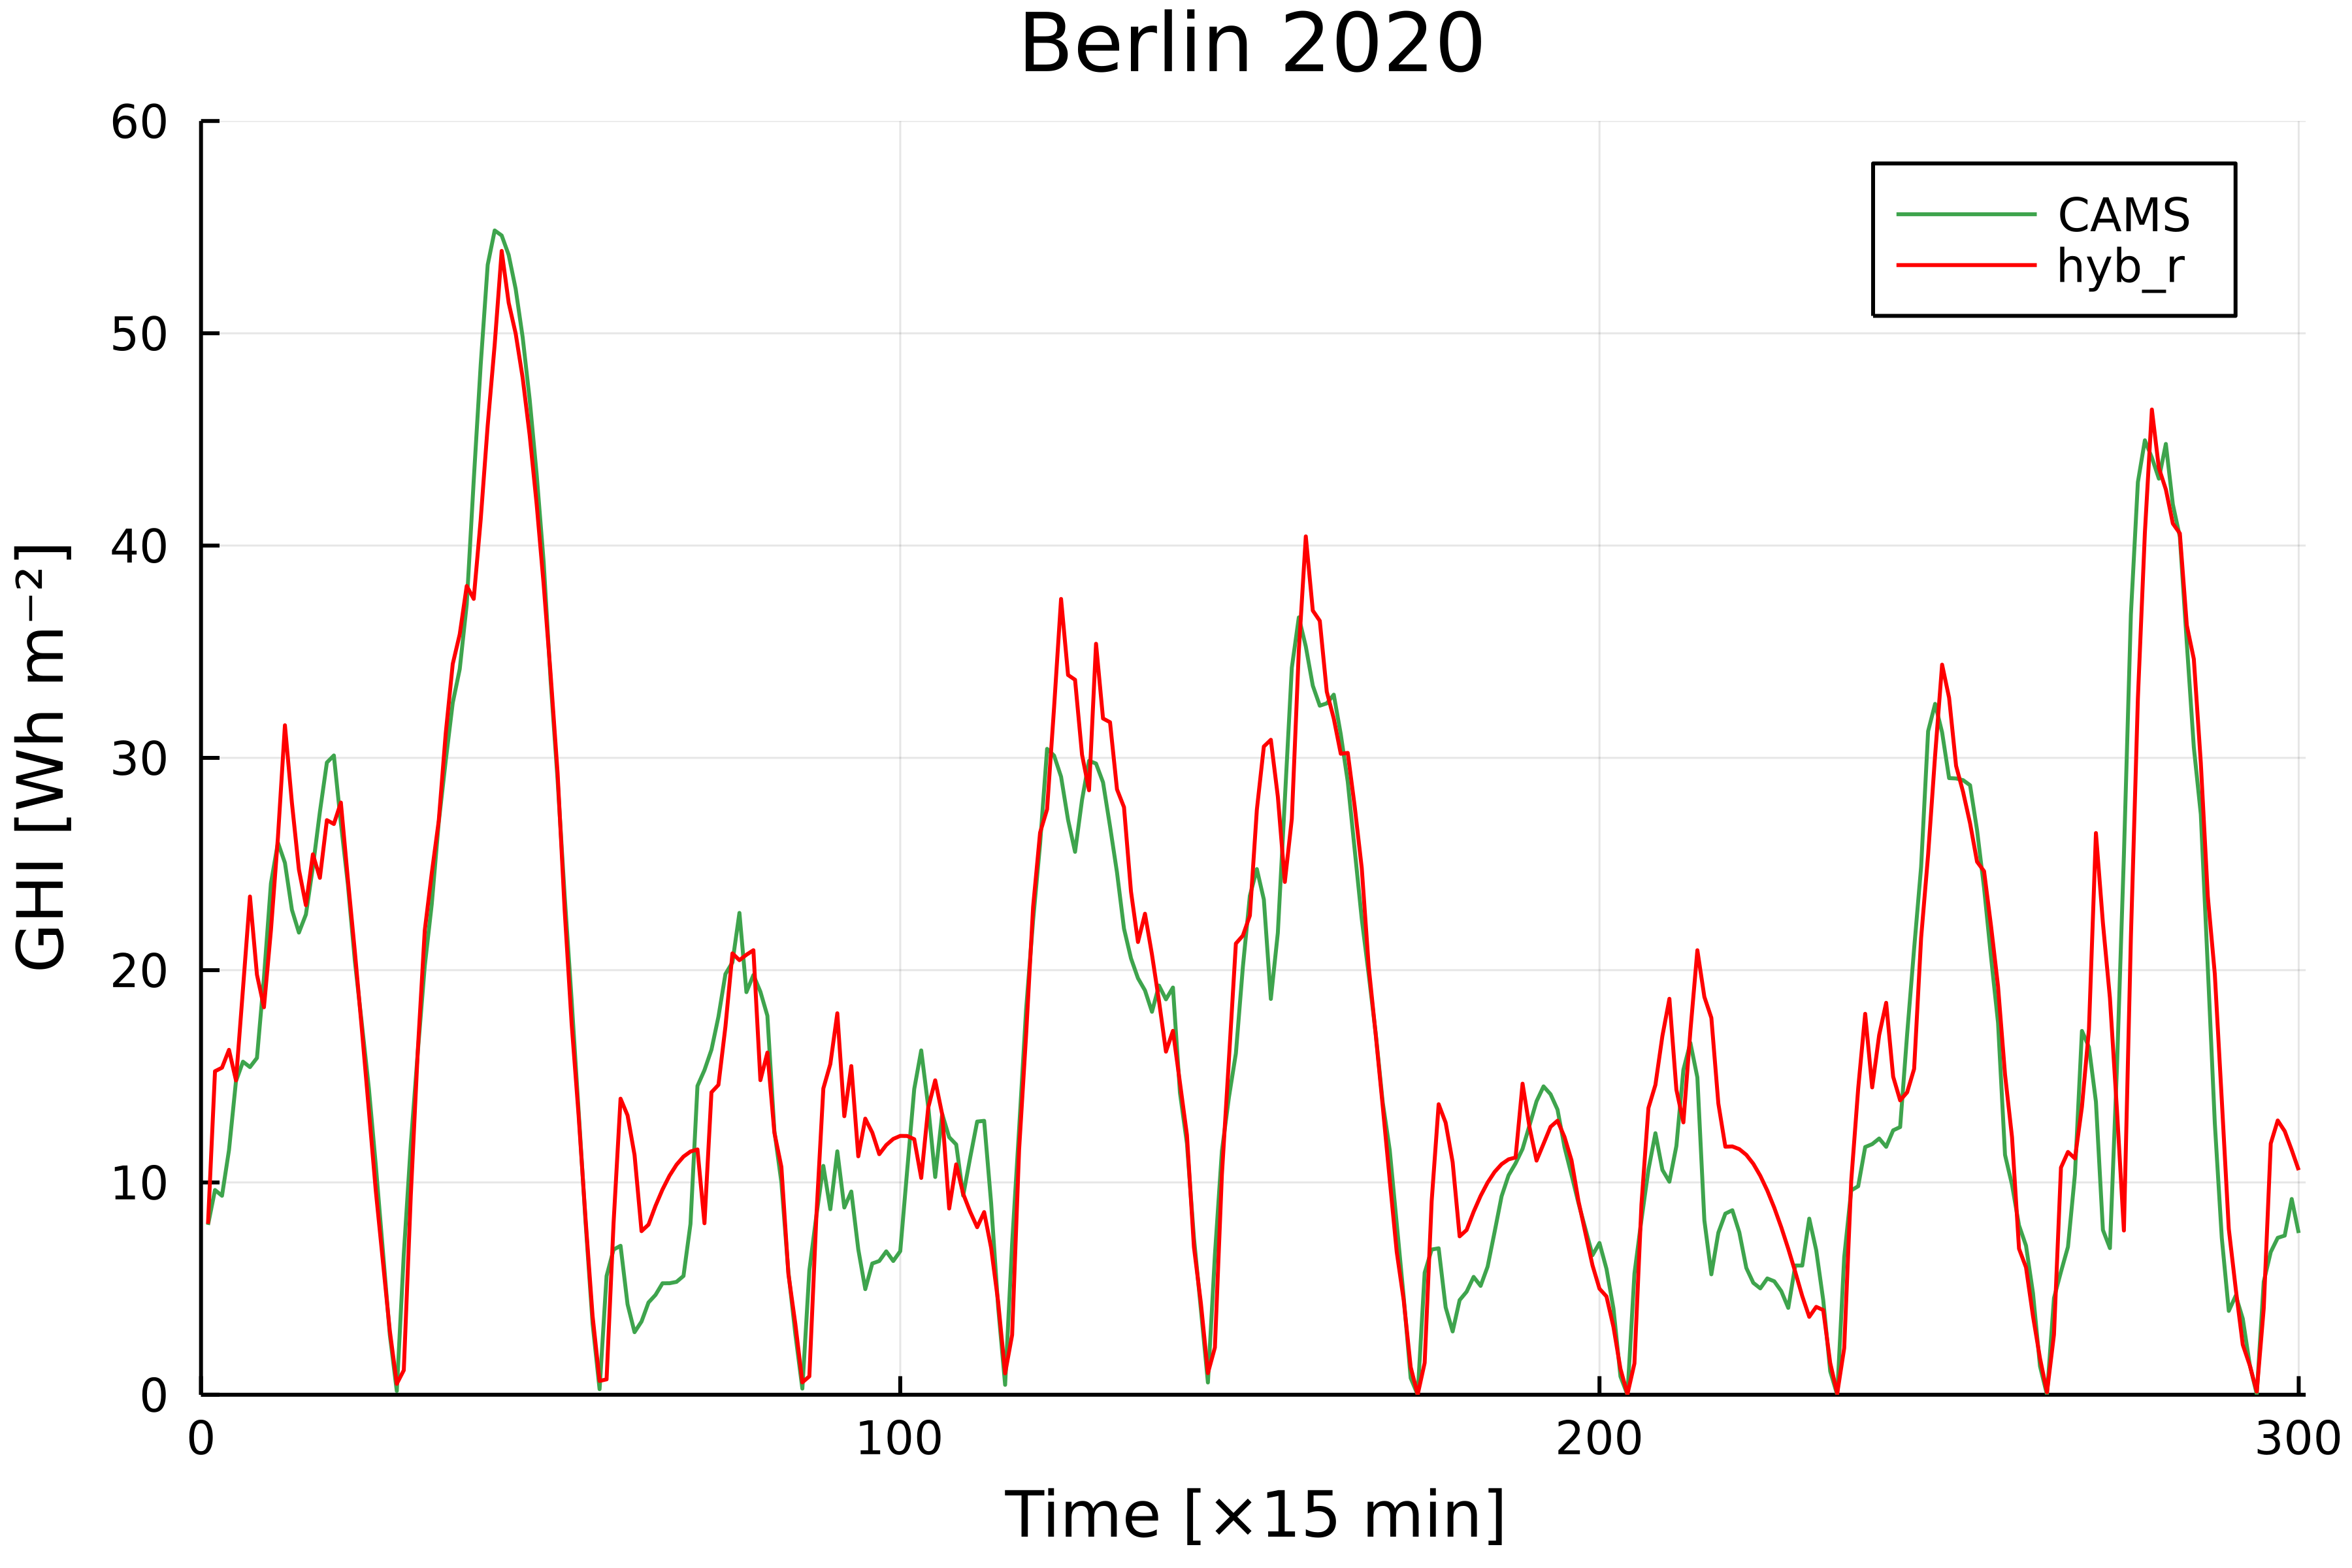

In [28]:
pg_d = plot([ghi ghi_hyb_r], c=[3 "red"], label=["CAMS" "hyb_r"], 
    xlim=(0,301), ylim=(0,60),
    xlabel="Time [×15 min]", ylabel="GHI [Wh m⁻²]", title=city*" 2020")

In [29]:
gb = groupby(df2g, :month)
ghi = [mean(g.ghi) for g in gb]
ghi_hyb_r = [mean(g.ghi_hyb_r) for g in gb];

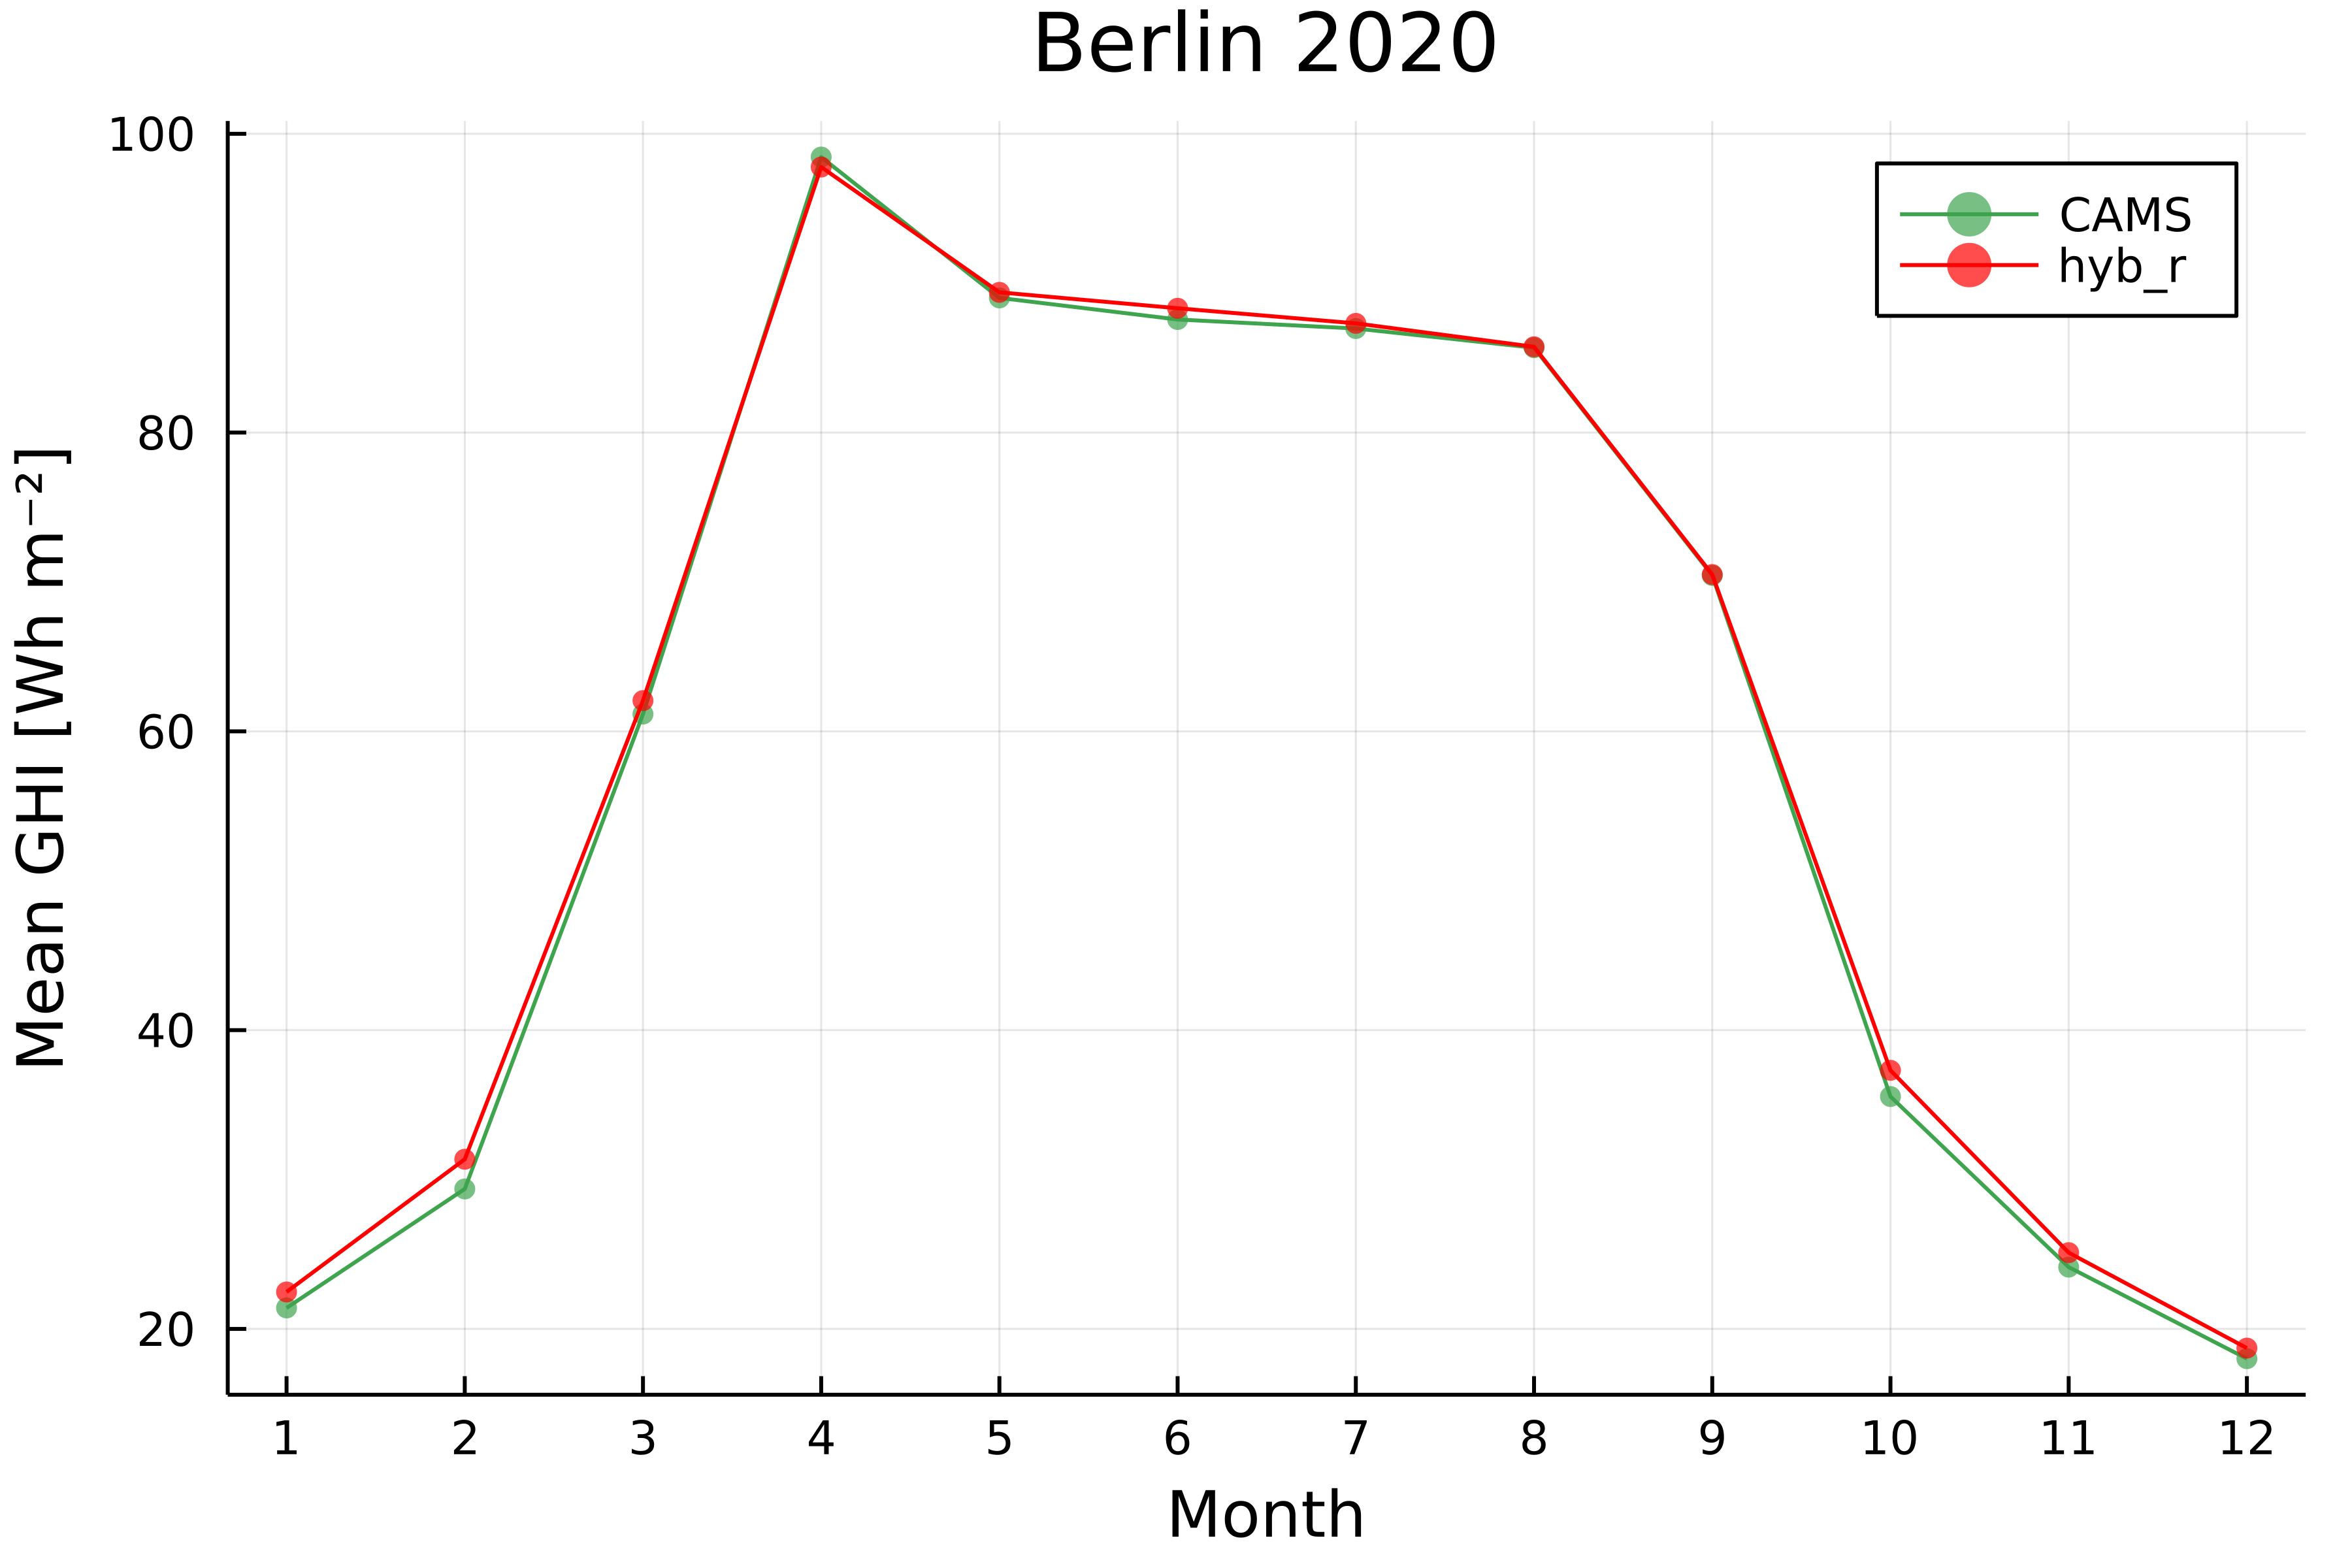

In [30]:
pg_m = plot([ghi ghi_hyb_r], c=[3 "red"], label=["CAMS" "hyb_r"], marker=(3, 0.7, stroke(0)),
    xticks=1:12, xlabel="Month", ylabel="Mean GHI [Wh m⁻²]", title=city*" 2020")

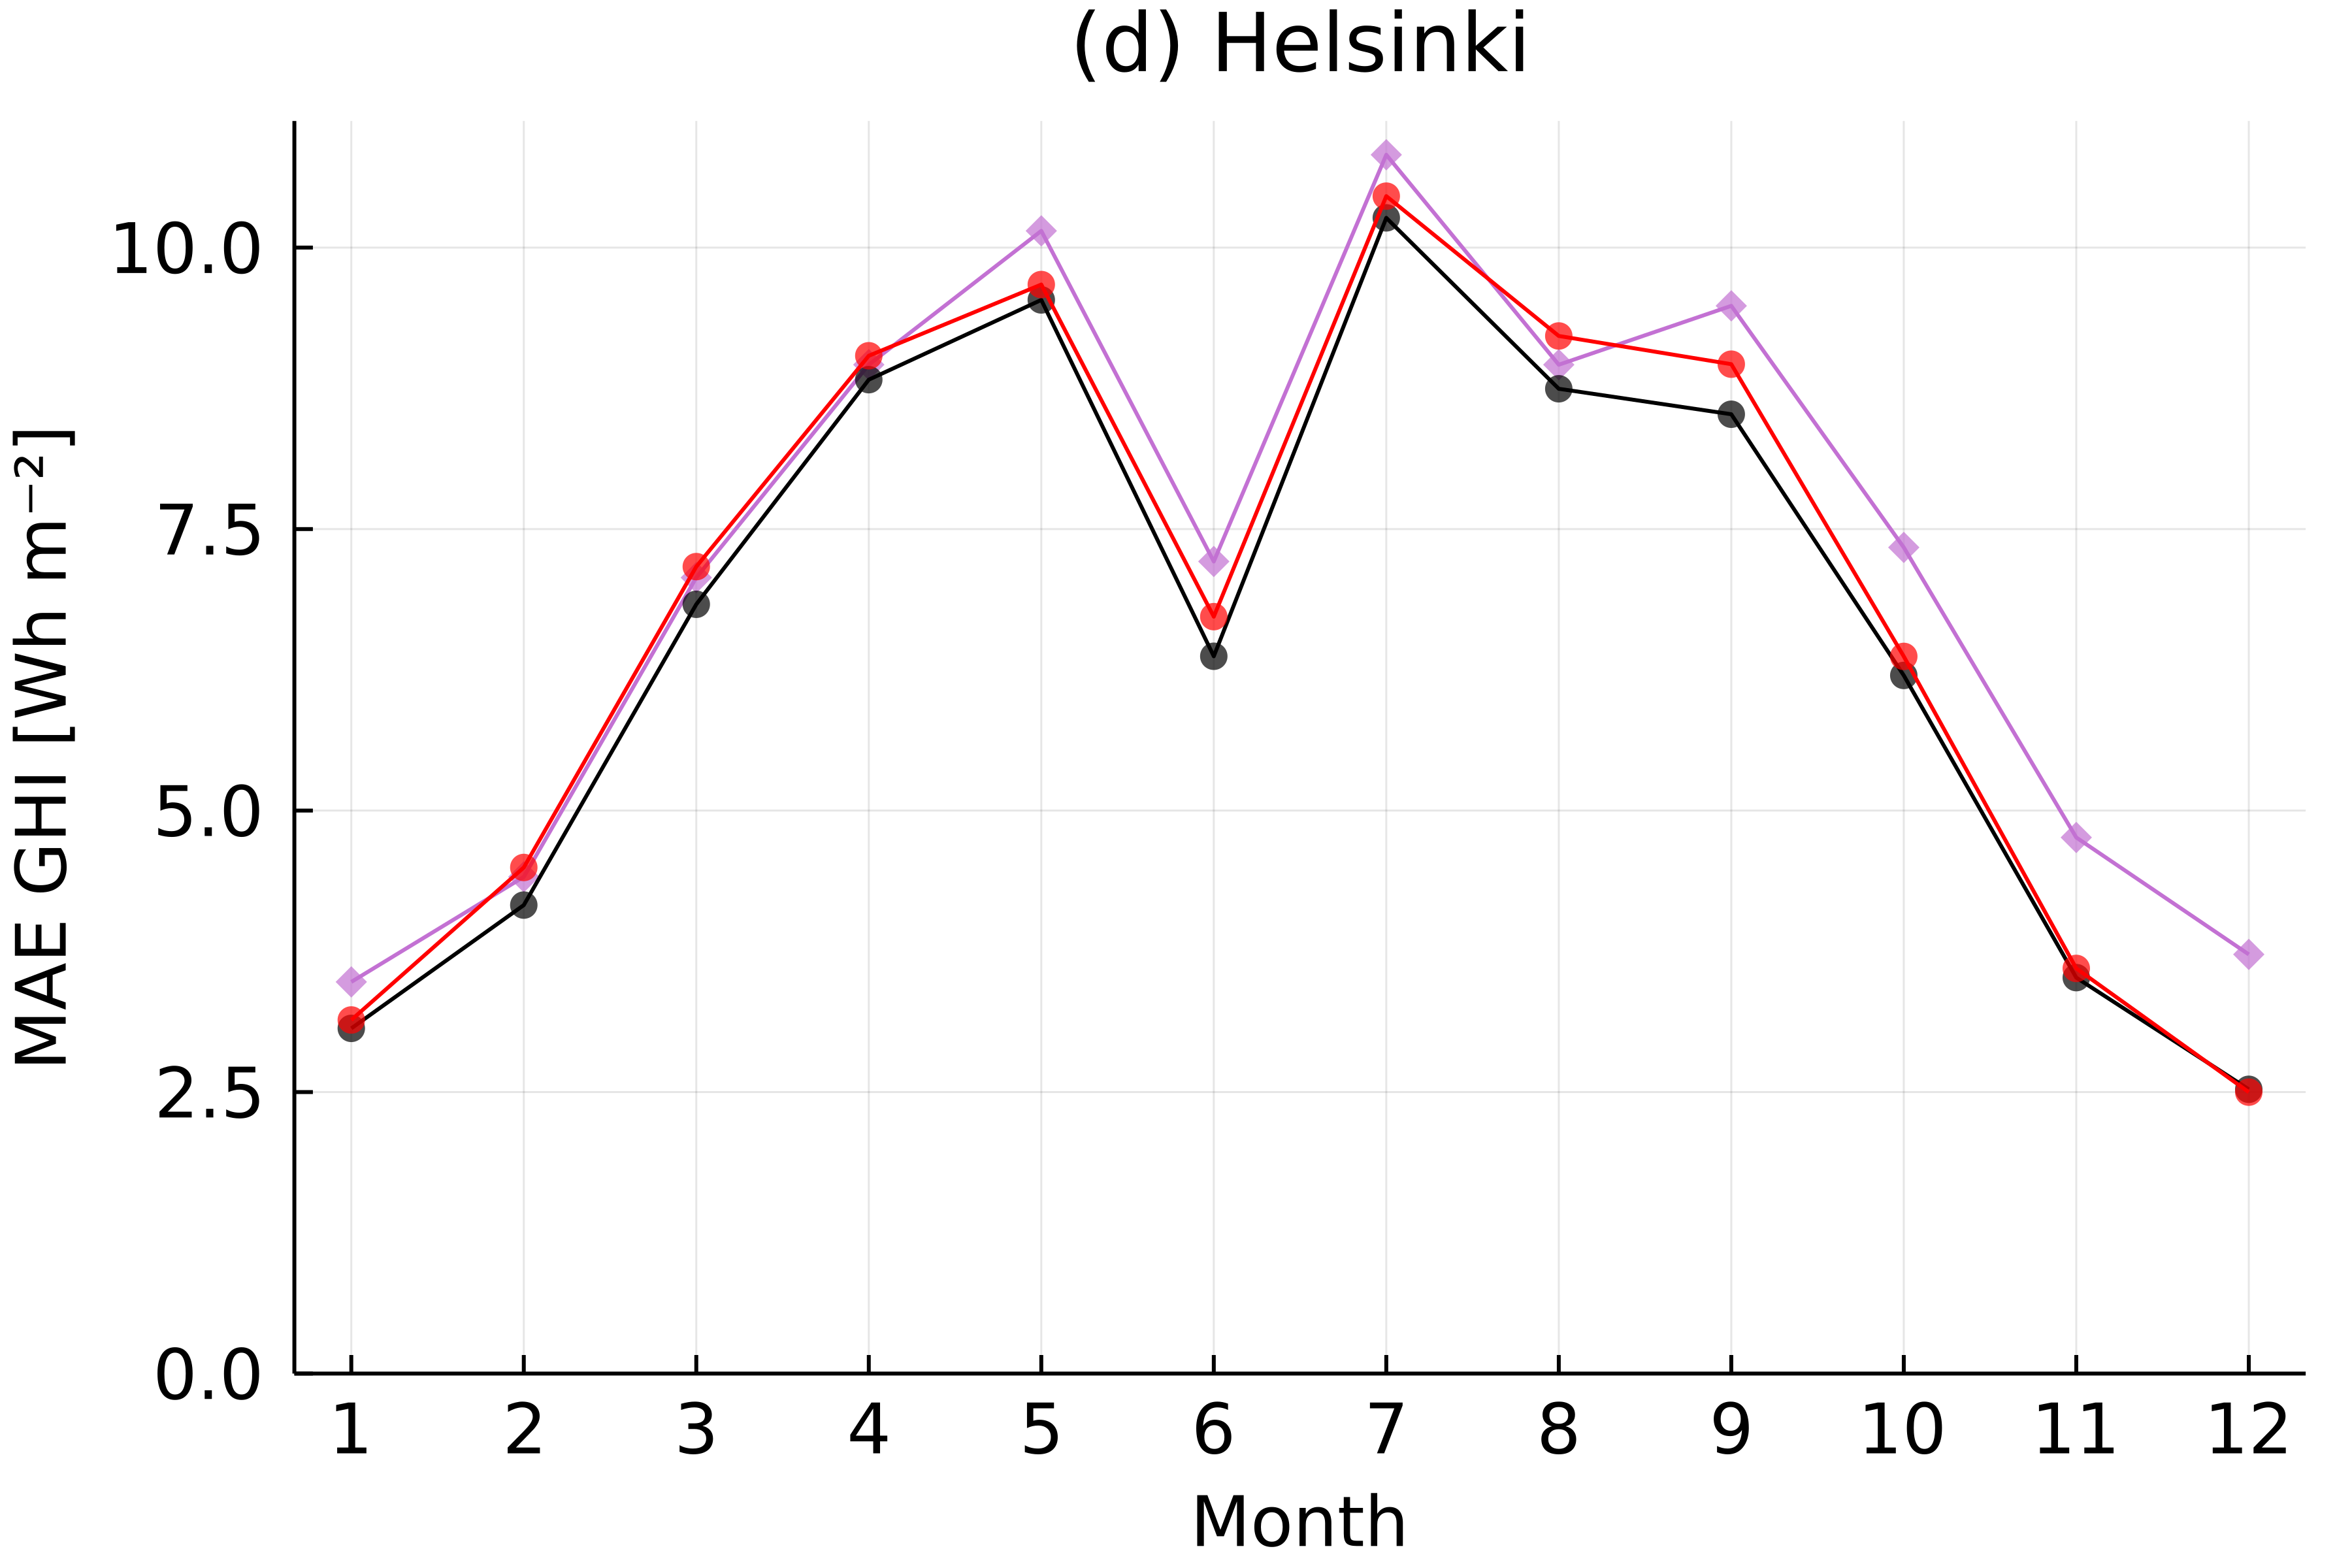

In [136]:
pg4 = viz_ghi_err(df4g, 4; tit=city1) #"(c) "*city)
plot(pg4, labelfontsize=12, tickfontsize=12) #, legendfontsize=10)

#### rel. improvement

In [135]:
df1g = getGHI(df1t, 1)
df2g = getGHI(df2t, 2)

df3g = getGHI(df3t, 3)
df4g = getGHI(df4t, 4);

In [100]:
rDif1 = rDif(df1g)
rDif2 = rDif(df2g)
rDif3 = rDif(df3g)
rDif4 = rDif(df4g);

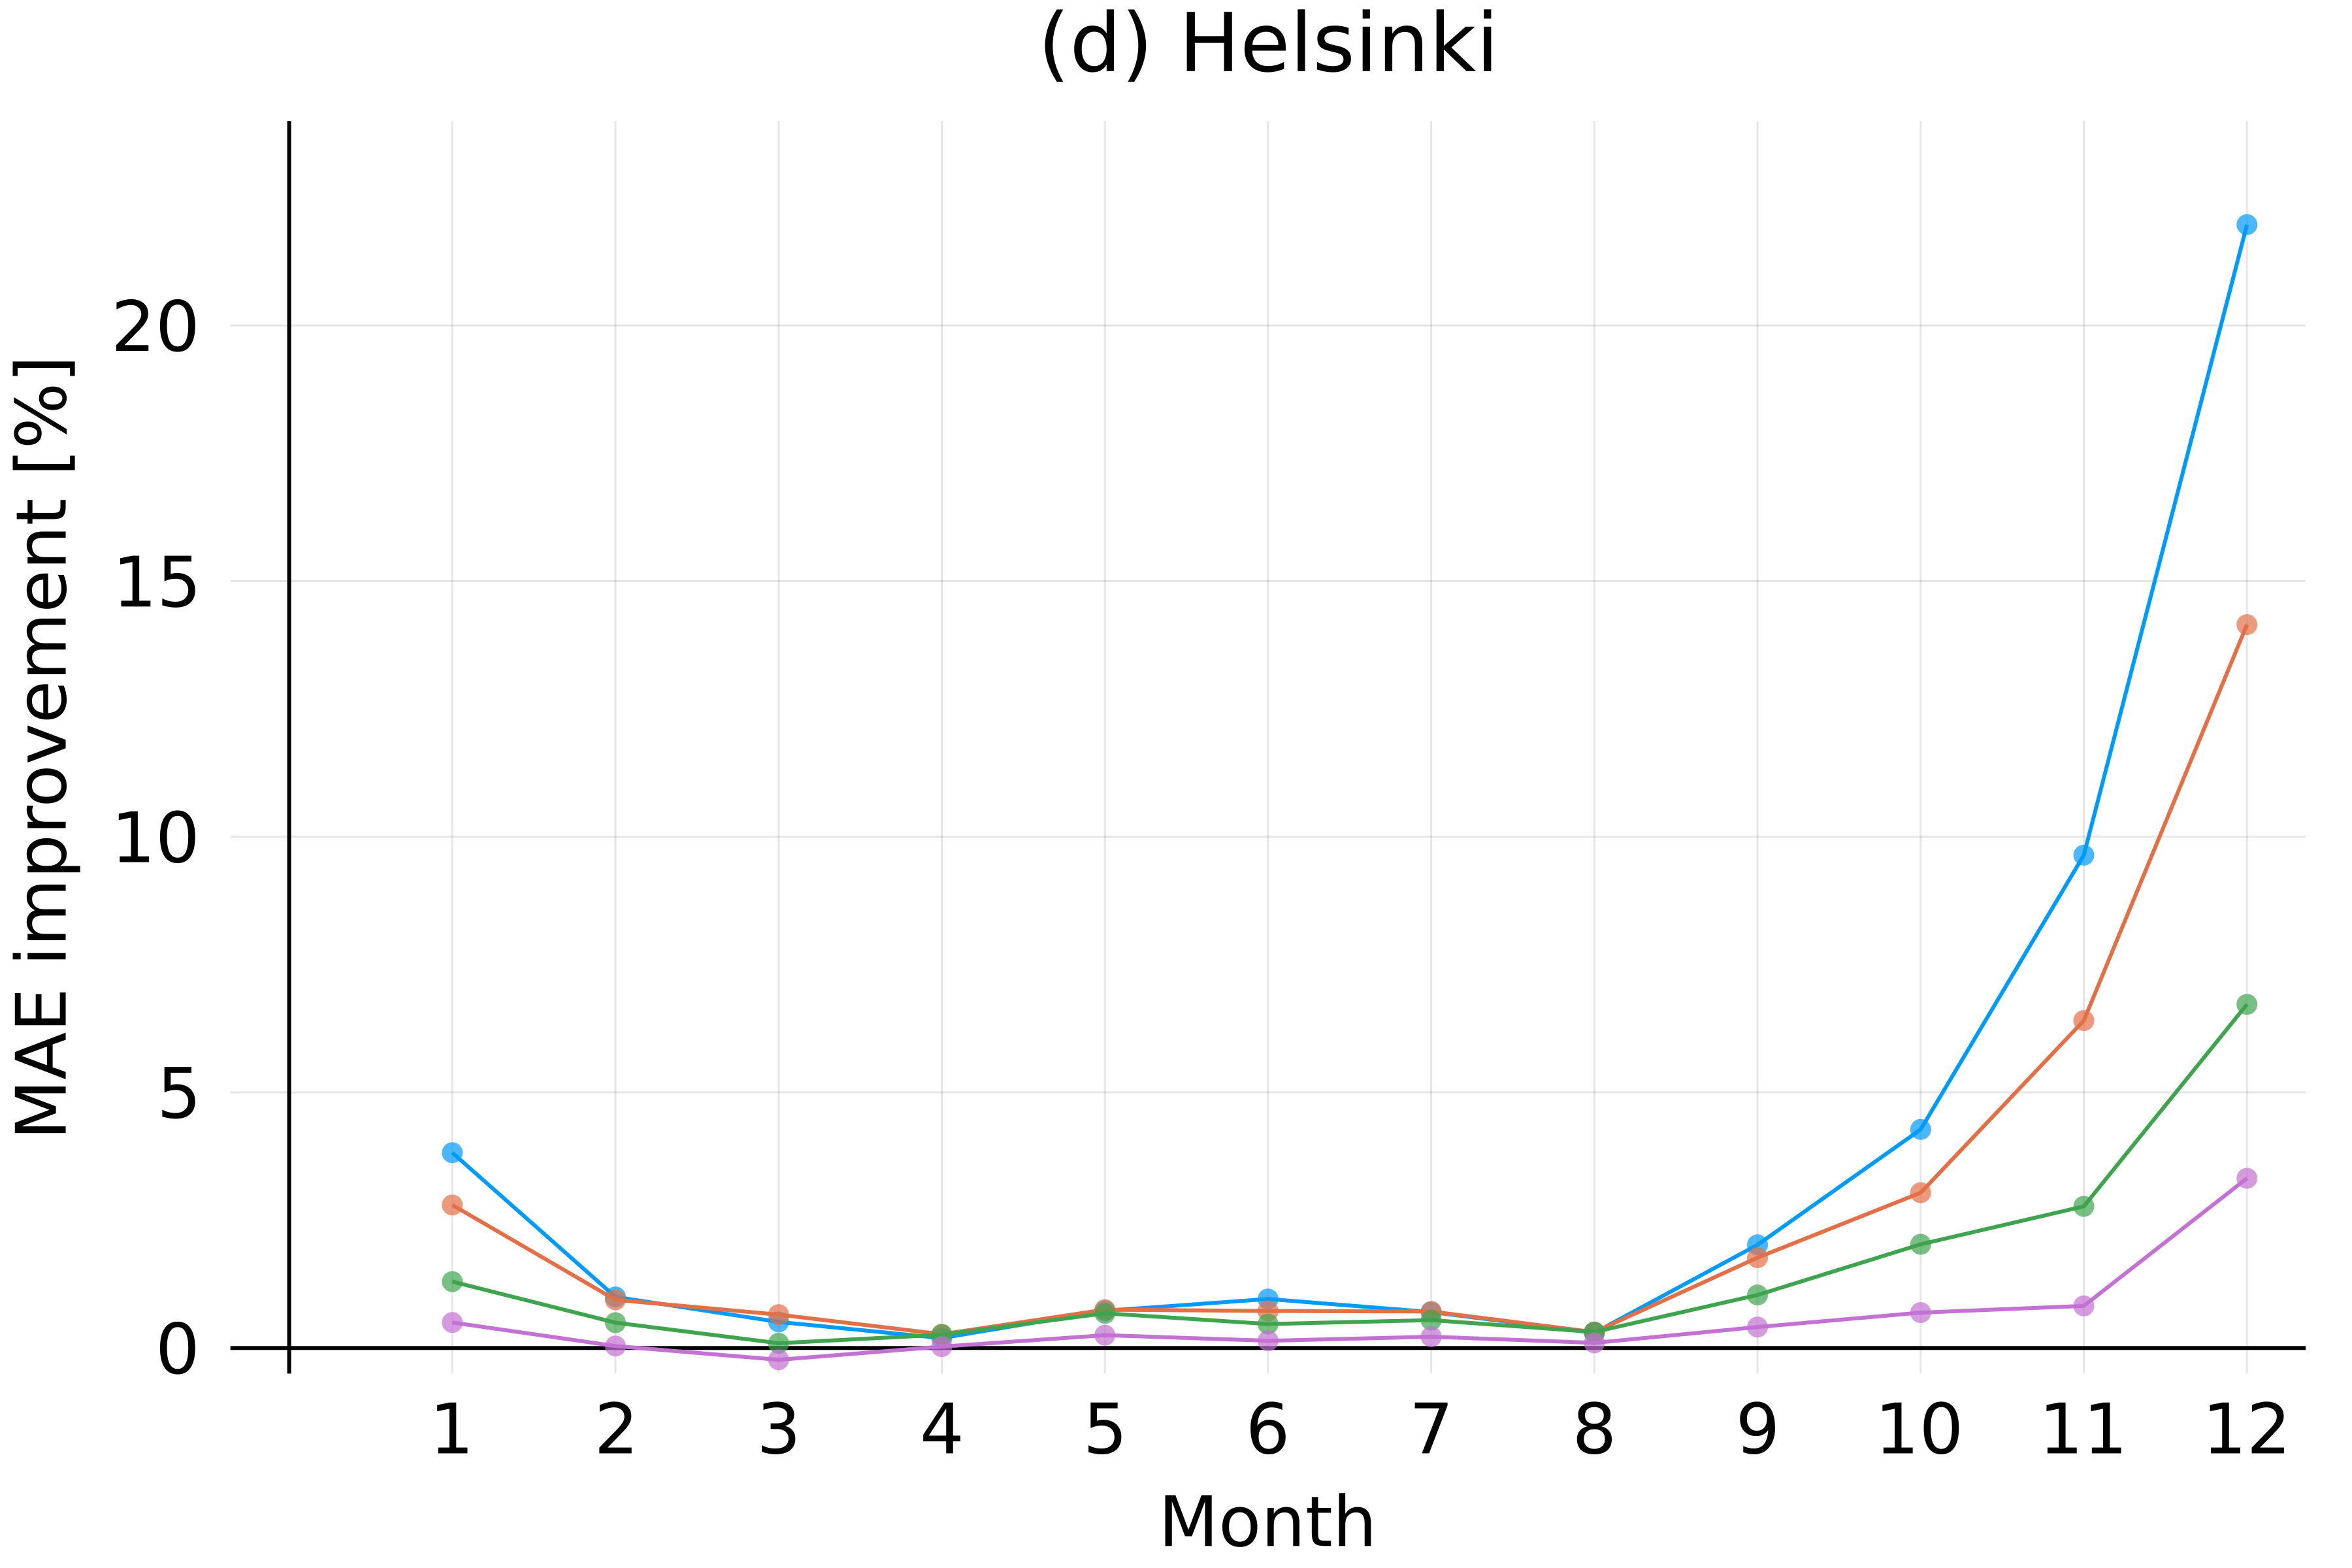

In [102]:
pRdif_m = plot([rDif4 rDif3 rDif2 rDif1], marker=(3, 0.7, stroke(0)), frame=:zerolines, 
    label=["+60 min" "+45 min" "+30 min" "+15 min"], 
    labelfontsize=12, tickfontsize=12, 
#     leg=:topleft, ylim=(), # at
    leg=:none, 
#     ylim=(-0.2, 5), title="(c) "*city # be
    ylim=(-0.5, 24), title=city1, # he
    title=city, xticks=1:12, xlabel="Month", ylabel="MAE improvement [%]")

### Neighbor cells

In [3]:
fn_berlin = "irradiation_Berlin.nc";

fn_berlin_w  = "irradiation_Berlin_W.nc";
fn_berlin_sw = "irradiation_Berlin_SW.nc"
fn_berlin_s  = "irradiation_Berlin_S.nc"
fn_berlin_se = "irradiation_Berlin_SE.nc"
fn_berlin_e  = "irradiation_Berlin_E.nc"
fn_berlin_ne = "irradiation_Berlin_NE.nc"
fn_berlin_n  = "irradiation_Berlin_N.nc"
fn_berlin_nw = "irradiation_Berlin_NW.nc";

In [4]:
function getCMFraw(fn)
    fn_ = joinpath("data", fn)    
    ghi = getNCvar(fn_, "GHI")
    ghiCS = getNCvar(fn_, "CLEAR_SKY_GHI");
    cmf = ghi ./ ghiCS
    return cmf
end

getCMFraw (generic function with 1 method)

In [5]:
cmf_c = getCMFraw(fn_berlin)
cmf_w = getCMFraw(fn_berlin_w);

In [6]:
cmf_n, cmf_e, cmf_s, cmf_sw, cmf_se, cmf_ne, cmf_nw = 
getCMFraw.([fn_berlin_n, fn_berlin_e, fn_berlin_s, 
            fn_berlin_sw, fn_berlin_se,
            fn_berlin_ne, fn_berlin_nw]);

### Corr with neighbor

In [7]:
function cor_neib(cmf_c, cmf_neib)
    df = DataFrame(:c => cmf_c[2:end], :neib => cmf_neib[1:end-1])
    filter!([:c, :neib] => (c, n) -> c.<0.95 && n.<0.95, df) # excluding clear-sky days with CMF > 0.95
    return cor(df.c, df.neib)
end

cor_neib (generic function with 1 method)

In [8]:
cor_w = cor_neib(cmf_c, cmf_w)

cor_n = cor_neib(cmf_c, cmf_n)
cor_e = cor_neib(cmf_c, cmf_e)
cor_s = cor_neib(cmf_c, cmf_s)

cor_sw = cor_neib(cmf_c, cmf_sw)
cor_se = cor_neib(cmf_c, cmf_se)
cor_ne = cor_neib(cmf_c, cmf_ne)
cor_nw = cor_neib(cmf_c, cmf_nw);

In [9]:
cor_mat = reshape([
    cor_sw, cor_s, cor_se,    
    cor_w,     1,  cor_e,
    cor_nw, cor_n, cor_ne
], 3, 3);

corMat = rd.(cor_mat, 3);

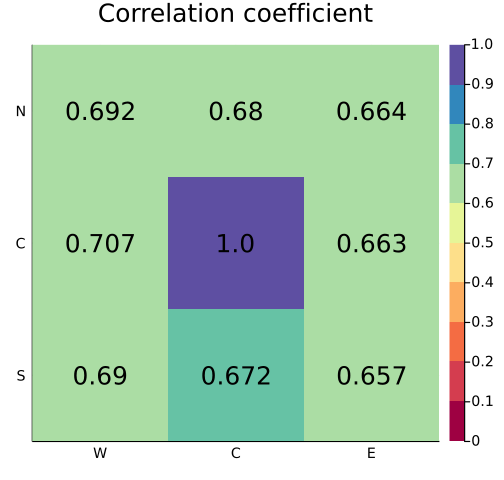

In [10]:
hm = heatmap(1:3, 1:3, cor_mat, c=palette(:Spectral_10), clim=(0,1), size=(420,400), 
    title="Correlation coefficient",
    xticks=(1:3, ["W", "C", "E"]), yticks=(1:3, ["S", "C", "N"]))
for i=1:3, j=1:3
    annotate!(i,j, corMat[i, j])
end
hm 